### Import Required Libraries

In [1]:
# Libraries to process file and visualization for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Display full view of columns without truncate
pd.options.display.max_columns = None

In [2]:
# Library version
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)

Numpy Version:  2.3.3
Pandas Version:  2.3.2


### Import Dataset

In [3]:
# Import dataset file and get panda dataframe. Also copy original dataframe to future reference.
dataset = pd.read_csv("Gujarat_Rainfall.csv")
dataset_original = dataset.copy()

### Summary of Dataset
This dataset is a comprehensive collection of historical weather data for `Gujarat` state in India. It includes information on the amount of rainfall recorded each day from the `8th DEC 2015` to the `10th FEB 2025`, allowing for a detailed analysis of precipitation patterns across different districts in Gujarat. This dataset contains 15 columns such as date of record, month, season, station name (exact location), state, district, average temperature, minimum temperature, maximum temperature, wind speed, air pressure, elevation, latitude, longitude, rainfall in mm.

In [4]:
# check total number of rows and columns
dataset.shape

(61988, 15)

In [5]:
# Check first five rows 
dataset.head()

date_of_record     month  season station_name state     district  avg_temp  \
0     2015-12-08  December  Winter        Deesa    GJ  Banaskantha      26.4   
1     2015-12-09  December  Winter        Deesa    GJ  Banaskantha      25.6   
2     2015-12-10  December  Winter        Deesa    GJ  Banaskantha      25.2   
3     2015-12-11  December  Winter        Deesa    GJ  Banaskantha      21.5   
4     2015-12-12  December  Winter        Deesa    GJ  Banaskantha      20.8   

   min_temp  max_temp  wind_speed  air_pressure  elevation  latitude  \
0      14.6      32.7         NaN           NaN        135      24.2   
1      15.6      30.0         NaN           NaN        135      24.2   
2      16.6      30.0         NaN           NaN        135      24.2   
3      13.4      25.6         NaN           NaN        135      24.2   
4      10.2      26.2         NaN           NaN        135      24.2   

   longitude  rainfall  
0       72.2       NaN  
1       72.2       NaN  
2       72.2       NaN  
3       72.2       NaN  
4       72.2       NaN

### Columns Description
- `date_of_record` - The specific date on which the weather observations were recorded (in `YYYY-MM-DD` format).

- `month` - The month extracted from the date, useful for monthly trend analysis.

- `season` - The meteorological season corresponding to the date — typically `Winter (Dec–Feb)`, `Pre-Monsoon (Mar–May)`, `Monsoon (Jun–Sep)`, or `Post-Monsoon (Oct–Nov)` for India.

- `station_name` - The name of the weather station where the data was collected. Each station corresponds to a specific geographical location.

- `state` - The Indian state or union territory where the weather station is located.

- `district` - The district (administrative division) within the state where the weather station operates.

- `avg_temp` - The average daily temperature recorded at the station, measured in degrees Celsius (°C).

- `min_temp` - The minimum temperature observed during the day (°C).

- `max_temp` - The maximum temperature observed during the day (°C).  

- `wind_speed` - The wind speed recorded at the station, measured in kilometers per hour (km/h).

- `air_pressure` - The atmospheric pressure measured at the station, measured in hectopascals (hPa) or millibars (mb).

- `elevation` - The height above sea level of the weather station, measured in meters (m) — affects temperature and pressure readings.

- `latitude` - The geographical latitude (in decimal degrees) of the station, indicating its north–south position on the Earth.

- `longitude` - The geographical longitude (in decimal degrees) of the station, indicating its east–west position on the Earth.

- `rainfall` - The total rainfall measured during the day, measured in millimeters (mm).

In [6]:
# check all available columns
dataset.columns

Index(['date_of_record', 'month', 'season', 'station_name', 'state',
       'district', 'avg_temp', 'min_temp', 'max_temp', 'wind_speed',
       'air_pressure', 'elevation', 'latitude', 'longitude', 'rainfall'],
      dtype='object')

In [7]:
# Check last five rows
dataset.tail()

date_of_record     month  season     station_name state district  \
61983     2025-02-06  February  Winter  Surat / Magdala    GJ    Surat   
61984     2025-02-07  February  Winter  Surat / Magdala    GJ    Surat   
61985     2025-02-08  February  Winter  Surat / Magdala    GJ    Surat   
61986     2025-02-09  February  Winter  Surat / Magdala    GJ    Surat   
61987     2025-02-10  February  Winter  Surat / Magdala    GJ    Surat   

       avg_temp  min_temp  max_temp  wind_speed  air_pressure  elevation  \
61983      24.3      17.0      31.0        20.2        1012.3          5   
61984      25.5      19.0      33.0        14.4        1012.6          5   
61985      25.3      17.0      33.0         9.8        1012.3          5   
61986      25.3      17.0      34.0         8.3        1011.8          5   
61987      24.6      17.0      30.7        14.0        1013.0          5   

       latitude  longitude  rainfall  
61983   21.1141    72.7418       0.0  
61984   21.1141    72.7418       0.0  
61985   21.1141    72.7418       0.0  
61986   21.1141    72.7418       0.0  
61987   21.1141    72.7418       0.0

In [8]:
# Check random five rows
dataset.sample(5)

date_of_record      month        season      station_name state  \
37672     2025-02-05   February        Winter  Baroda Aerodrome    GJ   
50192     2020-09-08  September       Monsoon             Surat    GJ   
36434     2021-09-06  September       Monsoon  Baroda Aerodrome    GJ   
6545      2016-02-28   February        Winter    Bhuj-Rudramata    GJ   
14194     2018-11-10   November  Post-monsoon         Ahmadabad    GJ   

        district  avg_temp  min_temp  max_temp  wind_speed  air_pressure  \
37672   Vadodara      20.8      11.0      28.0        13.0        1013.8   
50192      Surat      30.4      27.1       NaN         NaN           NaN   
36434   Vadodara      29.3      25.3      34.0         6.2        1003.7   
6545     Kachchh      27.9      18.6       NaN         NaN           NaN   
14194  Ahmedabad      26.3      15.6      36.0         2.3        1012.5   

       elevation  latitude  longitude  rainfall  
37672         37   22.3333    73.2667       0.0  
50192         10   21.2000    72.8333       5.1  
36434         37   22.3333    73.2667      10.1  
6545          78   23.2500    69.6667       NaN  
14194         55   23.0667    72.6333       NaN

In [9]:
# check all columns datatypes also observe non-null values.
dataset.info()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There are total 61988 records available, range from 0 to 61987.
# 2) All columns except "date_of_record" are in correct datatype. convert "date_of_record" in datetime datatype. 
# 3) The "state" column we can remove. because, this dataset only for Gujarat state.
# 4) There are missing values in min_temp, max_temp, wind_speed, air_pressure, rainfall.
# -------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61988 entries, 0 to 61987
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_of_record  61988 non-null  object 
 1   month           61988 non-null  object 
 2   season          61988 non-null  object 
 3   station_name    61988 non-null  object 
 4   state           61988 non-null  object 
 5   district        61988 non-null  object 
 6   avg_temp        61988 non-null  float64
 7   min_temp        60131 non-null  float64
 8   max_temp        50259 non-null  float64
 9   wind_speed      39895 non-null  float64
 10  air_pressure    39474 non-null  float64
 11  elevation       61988 non-null  int64  
 12  latitude        61988 non-null  float64
 13  longitude       61988 non-null  float64
 14  rainfall        40122 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 7.1+ MB


### Checking Missing Values

In [10]:
# Get total missing values and it's percentages

total_missing = dataset.isnull().sum()
percentage_missing = np.round((total_missing * 100) / len(dataset), 2)

missing_value_df = pd.DataFrame([total_missing, percentage_missing], index=["Total_Missing", "%_Missing"]).T
missing_value_df

# -------------------------------------------------------------------------------------------
# Observation :
# 1) Here, we have missing values in dataset. columns 'min_temp' and 'max_temp' have 3% and 18.92% missing values resp.
# 2) columns 'wind_speed', 'air_pressure' and 'rainfall' have 35.64% , 36.32% , 35.27% missing values resp.
# 3) Columns with missing values 25% or greater need to drop respective column.
# 4) In imputation if variable is char then we will use mode function and if it is numeric then we will first check for outrliers if there are outrliers then we will impute by median else we will impute using mean.
# -------------------------------------------------------------------------------------------

Total_Missing  %_Missing
date_of_record            0.0       0.00
month                     0.0       0.00
season                    0.0       0.00
station_name              0.0       0.00
state                     0.0       0.00
district                  0.0       0.00
avg_temp                  0.0       0.00
min_temp               1857.0       3.00
max_temp              11729.0      18.92
wind_speed            22093.0      35.64
air_pressure          22514.0      36.32
elevation                 0.0       0.00
latitude                  0.0       0.00
longitude                 0.0       0.00
rainfall              21866.0      35.27

### Cleaning for Missing Values

In [11]:
# rainfall
dataset = dataset[~((dataset["rainfall"].isnull()) | (dataset["rainfall"]==0))]

# -------------------------------------------------------------------------------------------
# Observation :
# 1) "rainfall" feature is target variable. it contain 21866 null values and 26787 are 0 value. so, we decided to drop all null values and 0 values.
# -------------------------------------------------------------------------------------------

In [12]:
dataset.info()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There are total 13335 records available.
# 2) All columns except "date_of_record" are in correct datatype. convert "date_of_record" in datetime datatype. 
# 3) The "state" column we can remove. because, this dataset only for Gujarat state.
# 4) There are missing values in min_temp, max_temp, wind_speed, air_pressure.
# -------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Index: 13335 entries, 186 to 61880
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_of_record  13335 non-null  object 
 1   month           13335 non-null  object 
 2   season          13335 non-null  object 
 3   station_name    13335 non-null  object 
 4   state           13335 non-null  object 
 5   district        13335 non-null  object 
 6   avg_temp        13335 non-null  float64
 7   min_temp        13034 non-null  float64
 8   max_temp        11710 non-null  float64
 9   wind_speed      10743 non-null  float64
 10  air_pressure    10691 non-null  float64
 11  elevation       13335 non-null  int64  
 12  latitude        13335 non-null  float64
 13  longitude       13335 non-null  float64
 14  rainfall        13335 non-null  float64
dtypes: float64(8), int64(1), object(6)
memory usage: 1.6+ MB


In [13]:
total_missing = dataset.isnull().sum()
percentage_missing = np.round((total_missing * 100) / len(dataset), 2)

missing_value_df = pd.DataFrame([total_missing, percentage_missing], index=["Total_Missing", "%_Missing"]).T
missing_value_df

# -------------------------------------------------------------------------------------------
# Observation :
# 1) Now, we have missing values in "min_temp", "max_temp", "wind_speed", "air_pressure" as 2.26%, 12.19%, 19.44%, 19.83% resp.
# 2) As we have missing values percentage below 25% for all features and this all are numeric features then we will first check for outrliers if there are outrliers then we will impute by median else we will impute using mean.
# -------------------------------------------------------------------------------------------

Total_Missing  %_Missing
date_of_record            0.0       0.00
month                     0.0       0.00
season                    0.0       0.00
station_name              0.0       0.00
state                     0.0       0.00
district                  0.0       0.00
avg_temp                  0.0       0.00
min_temp                301.0       2.26
max_temp               1625.0      12.19
wind_speed             2592.0      19.44
air_pressure           2644.0      19.83
elevation                 0.0       0.00
latitude                  0.0       0.00
longitude                 0.0       0.00
rainfall                  0.0       0.00

### Check Statistical Measure for Numerical Columns

In [14]:
# Mean and Median(50%) difference is more than 10% then there are possible outliers present in data.
dataset.describe(include="number").T

# -------------------------------------------------------------------------------------------
# Observation :
# 1) In "avg_temp", "min_temp", "max_temp", "wind_speed", "air_pressure", "latitude", "longitude" features, mean and median difference is less than 10%. i.e. there are less or no outliers present in all this features.
# ) In 'elevation' and 'rainfall' columns, mean and median difference is more than 10% then there are possible outliers present in columns.
# -------------------------------------------------------------------------------------------

count         mean        std       min        25%        50%  \
avg_temp      13335.0    28.307567   1.889722   16.5000    27.4000    28.2000   
min_temp      13034.0    25.635921   1.884463    3.0000    25.0000    25.8000   
max_temp      11710.0    31.836558   2.703590   18.6000    30.0000    31.6000   
wind_speed    10743.0    15.744392   7.641317    0.0000    10.1000    14.2000   
air_pressure  10691.0  1003.920354   3.780962  988.8000  1001.4000  1003.9000   
elevation     13335.0    29.133033  38.183778    0.0000     5.0000    10.0000   
latitude      13335.0    22.097760   0.943922   20.6167    21.2000    22.3000   
longitude     13335.0    71.422268   1.425574   68.8500    70.2167    71.7833   
rainfall      13335.0    11.273971  24.207441    0.1000     0.7000     2.6000   

                    75%        max  
avg_temp        29.3000    35.8000  
min_temp        26.6000    30.6000  
max_temp        33.4000    44.0000  
wind_speed      20.0000    65.4000  
air_pressure  1006.3000  1022.6000  
elevation       41.0000   135.0000  
latitude        23.0000    24.2000  
longitude       72.7418    73.2667  
rainfall        10.9000   485.9000

In [15]:
dataset.describe(include="O").T

# -------------------------------------------------------------------------------------------
# Observation :
# 1) July month have most records about 3657, Monsoon season with 9613 records and surat district have highest frequency of records about 1848.
# -------------------------------------------------------------------------------------------

count unique              top   freq
date_of_record  13335   1283       2022-09-13     25
month           13335     12             July   3657
season          13335      4          Monsoon   9613
station_name    13335     25  Surat / Magdala    948
state           13335      1               GJ  13335
district        13335     17            Surat   1848

### Check Duplicate Records

In [16]:
dataset.duplicated().sum()

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There is no duplicated entries in dataset.
# -------------------------------------------------------------------------------------------

np.int64(0)

### Imputation of Missing Values

In [17]:
total_missing = dataset.isnull().sum()
cols = total_missing[total_missing > 0].index

for col in cols:
    dataset[col] = dataset[col].fillna(dataset[col].median())

In [18]:
total_missing = dataset.isnull().sum()
percentage_missing = np.round((total_missing * 100) / len(dataset), 2)

missing_value_df = pd.DataFrame([total_missing, percentage_missing], index=["Total_Missing", "%_Missing"]).T
missing_value_df

Total_Missing  %_Missing
date_of_record            0.0        0.0
month                     0.0        0.0
season                    0.0        0.0
station_name              0.0        0.0
state                     0.0        0.0
district                  0.0        0.0
avg_temp                  0.0        0.0
min_temp                  0.0        0.0
max_temp                  0.0        0.0
wind_speed                0.0        0.0
air_pressure              0.0        0.0
elevation                 0.0        0.0
latitude                  0.0        0.0
longitude                 0.0        0.0
rainfall                  0.0        0.0

In [19]:
dataset.describe(include="number").T

count         mean        std       min        25%        50%  \
avg_temp      13335.0    28.307567   1.889722   16.5000    27.4000    28.2000   
min_temp      13335.0    25.639625   1.863231    3.0000    25.0000    25.8000   
max_temp      13335.0    31.807732   2.534679   18.6000    30.3000    31.6000   
wind_speed    13335.0    15.444199   6.885699    0.0000    11.0000    14.2000   
air_pressure  13335.0  1003.916318   3.385417  988.8000  1002.2000  1003.9000   
elevation     13335.0    29.133033  38.183778    0.0000     5.0000    10.0000   
latitude      13335.0    22.097760   0.943922   20.6167    21.2000    22.3000   
longitude     13335.0    71.422268   1.425574   68.8500    70.2167    71.7833   
rainfall      13335.0    11.273971  24.207441    0.1000     0.7000     2.6000   

                    75%        max  
avg_temp        29.3000    35.8000  
min_temp        26.6000    30.6000  
max_temp        33.0000    44.0000  
wind_speed      18.3000    65.4000  
air_pressure  1005.6000  1022.6000  
elevation       41.0000   135.0000  
latitude        23.0000    24.2000  
longitude       72.7418    73.2667  
rainfall        10.9000   485.9000

### Types of Columns
- Numerical - avg_temp, min_temp, max_temp, wind_speed, air_pressure, elevation, latitude, longitude, rainfall.
- Categorical - month, season, station_name, state, district.
- Datatime - date_of_record.

In [20]:
# convert 'date_of_record' to datetime datatype.
dataset["date_of_record"] = pd.to_datetime(dataset["date_of_record"])

In [21]:
# Extract cols with respective data types.
numeric_cols = dataset.select_dtypes(include="number").columns
categorical_cols = dataset.select_dtypes(include="object").columns
datetime_cols = dataset.select_dtypes(include="datetime").columns

### Univariate Analysis for Numerical Columns

In [22]:
# univariate analysis for numerical columns. here, we view the descriptive statistics, skewness, histplot, boxplot for respective column.
def numerical_univariate(dataset, column):
    
    print("-"*100)
    print(f"Feature Name: {column}", end="\n\n")
    
    # 1. Print descriptive stats
    print("Descriptive Statistics:")
    print(dataset[column].describe())
    print(f"\nSkewness: {dataset[column].skew()}")

    # 2. Create plots
    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # Histogram + KDE
    sns.histplot(dataset[column], kde=True, ax=ax[0])
    ax[0].set_title(f"Distribution of {column}")
    ax[0].set_xlabel("")  

    # Boxplot
    sns.boxplot(x=dataset[column], ax=ax[1], orient="h")

    # Layout
    plt.tight_layout()
    plt.show()


----------------------------------------------------------------------------------------------------
Feature Name: avg_temp

Descriptive Statistics:
count    13335.000000
mean        28.307567
std          1.889722
min         16.500000
25%         27.400000
50%         28.200000
75%         29.300000
max         35.800000
Name: avg_temp, dtype: float64

Skewness: -0.7298755683135142


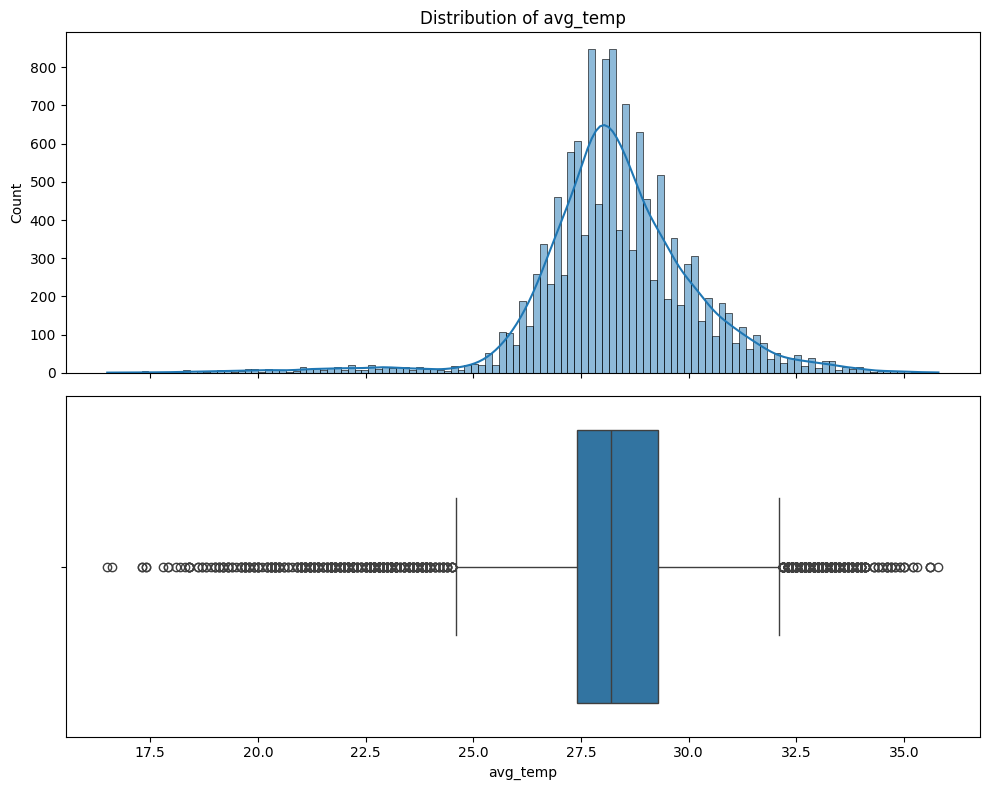

----------------------------------------------------------------------------------------------------
Feature Name: min_temp

Descriptive Statistics:
count    13335.000000
mean        25.639625
std          1.863231
min          3.000000
25%         25.000000
50%         25.800000
75%         26.600000
max         30.600000
Name: min_temp, dtype: float64

Skewness: -2.1288439884236183


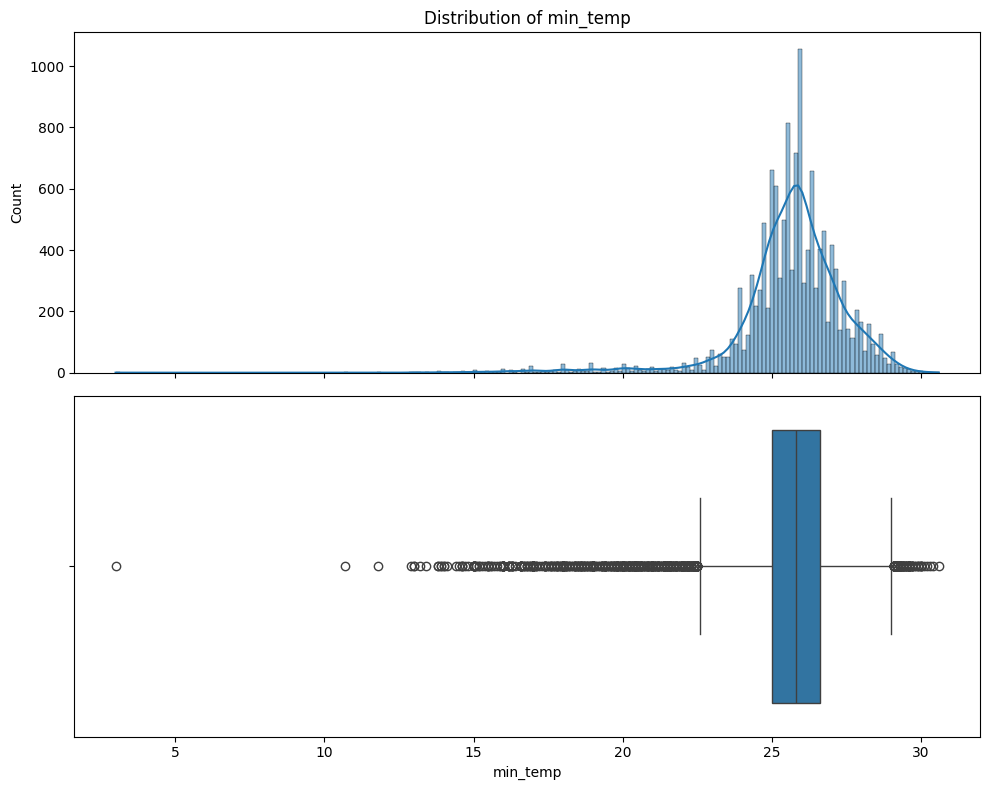

----------------------------------------------------------------------------------------------------
Feature Name: max_temp

Descriptive Statistics:
count    13335.000000
mean        31.807732
std          2.534679
min         18.600000
25%         30.300000
50%         31.600000
75%         33.000000
max         44.000000
Name: max_temp, dtype: float64

Skewness: 0.4145716991576939


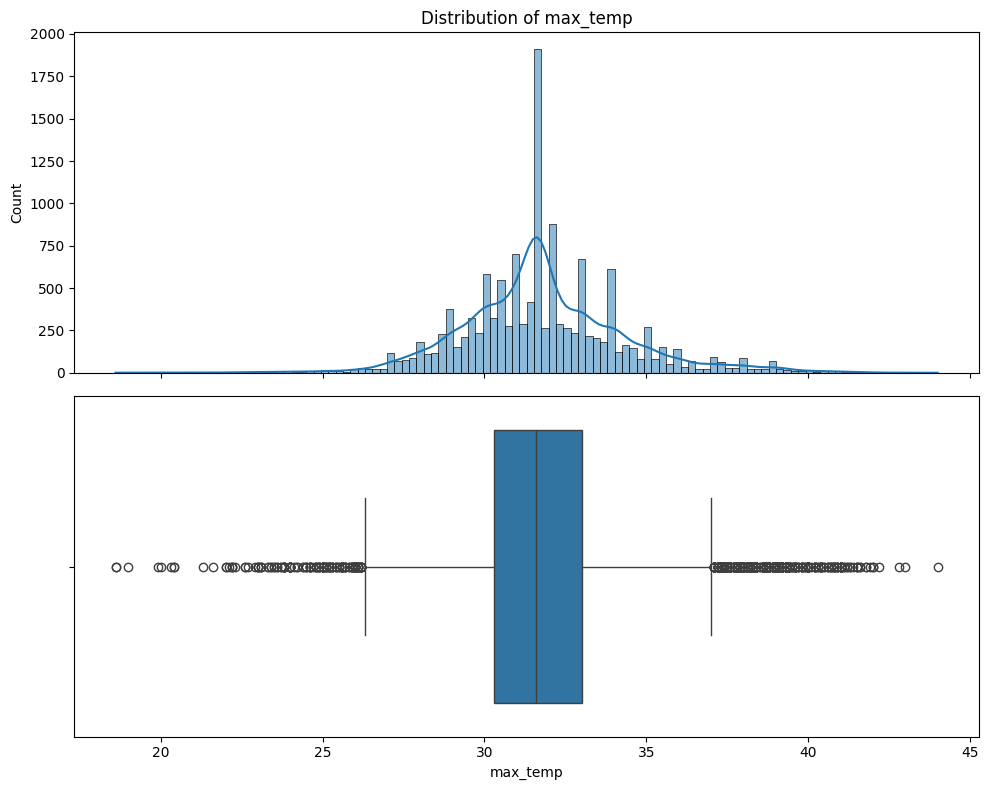

----------------------------------------------------------------------------------------------------
Feature Name: wind_speed

Descriptive Statistics:
count    13335.000000
mean        15.444199
std          6.885699
min          0.000000
25%         11.000000
50%         14.200000
75%         18.300000
max         65.400000
Name: wind_speed, dtype: float64

Skewness: 1.298346414390614


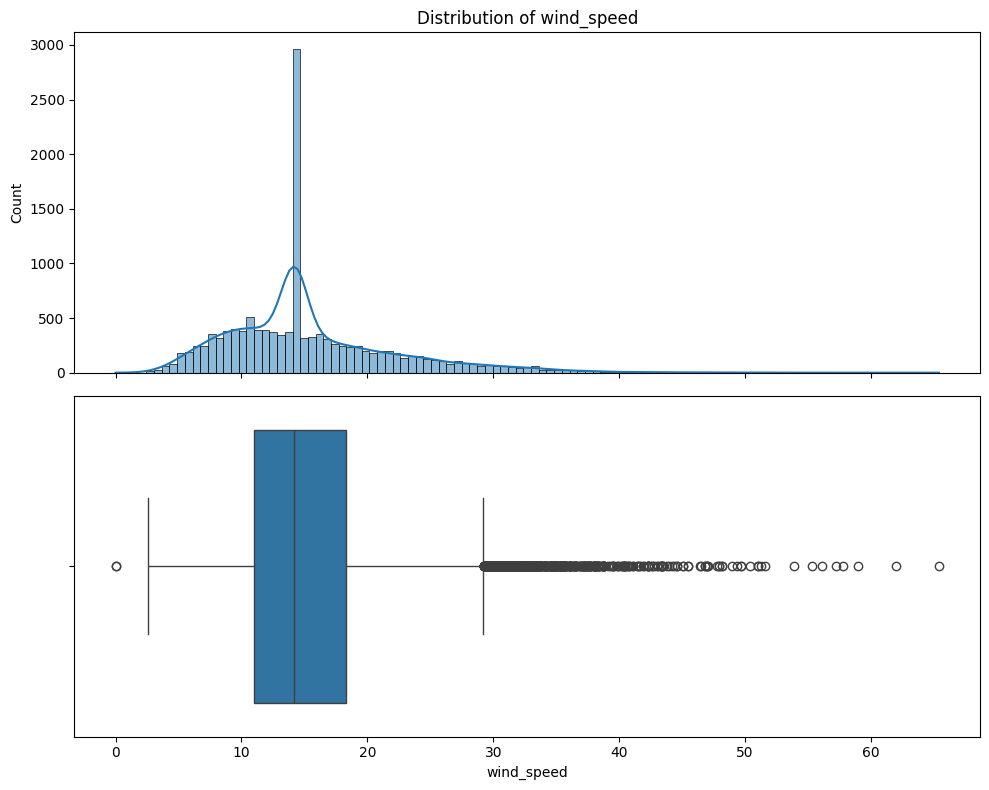

----------------------------------------------------------------------------------------------------
Feature Name: air_pressure

Descriptive Statistics:
count    13335.000000
mean      1003.916318
std          3.385417
min        988.800000
25%       1002.200000
50%       1003.900000
75%       1005.600000
max       1022.600000
Name: air_pressure, dtype: float64

Skewness: 0.20047392935515618


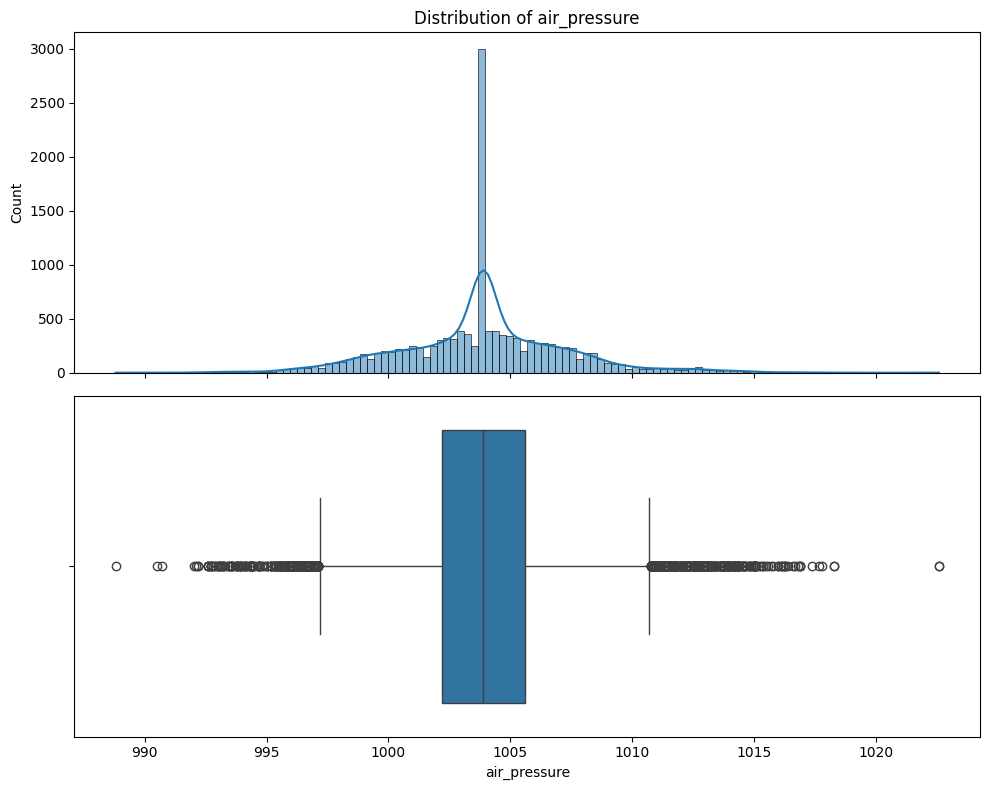

----------------------------------------------------------------------------------------------------
Feature Name: elevation

Descriptive Statistics:
count    13335.000000
mean        29.133033
std         38.183778
min          0.000000
25%          5.000000
50%         10.000000
75%         41.000000
max        135.000000
Name: elevation, dtype: float64

Skewness: 1.7510512400229434


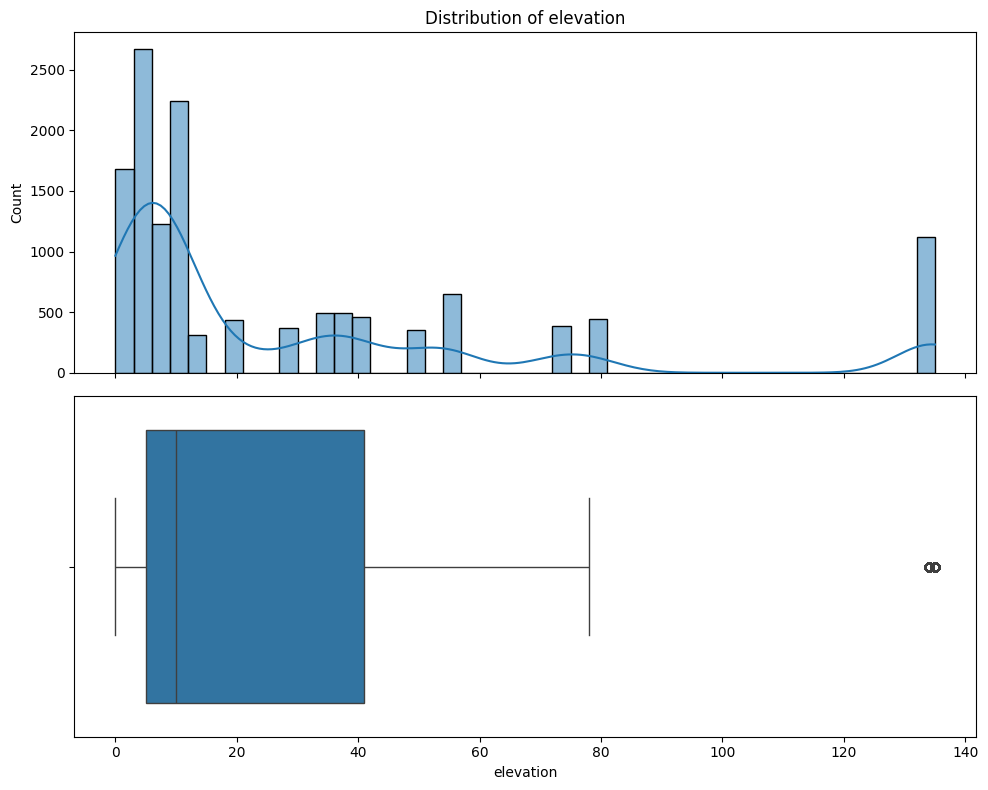

----------------------------------------------------------------------------------------------------
Feature Name: latitude

Descriptive Statistics:
count    13335.000000
mean        22.097760
std          0.943922
min         20.616700
25%         21.200000
50%         22.300000
75%         23.000000
max         24.200000
Name: latitude, dtype: float64

Skewness: 0.18928287298644128


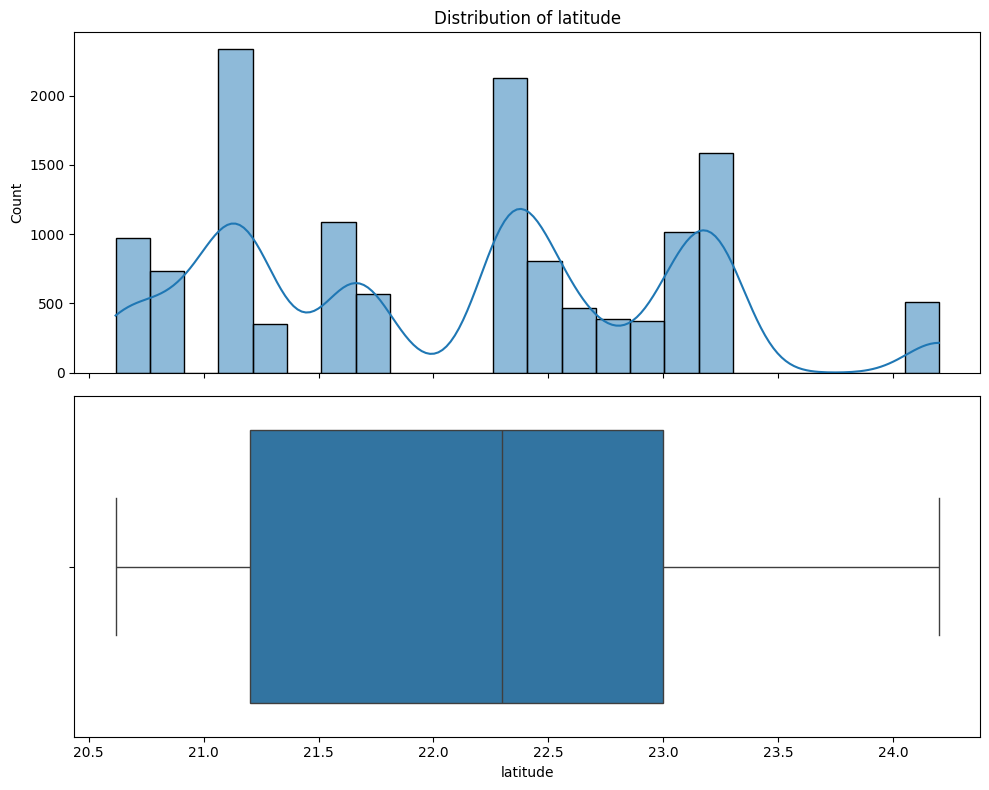

----------------------------------------------------------------------------------------------------
Feature Name: longitude

Descriptive Statistics:
count    13335.000000
mean        71.422268
std          1.425574
min         68.850000
25%         70.216700
50%         71.783300
75%         72.741800
max         73.266700
Name: longitude, dtype: float64

Skewness: -0.3236234273450293


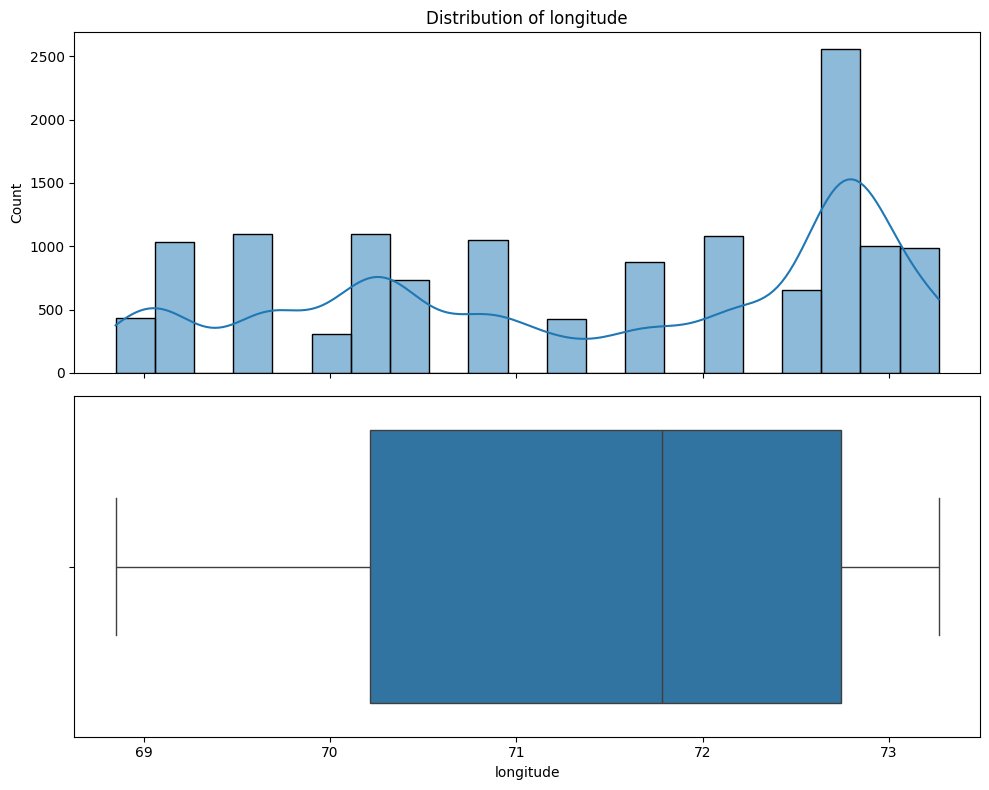

----------------------------------------------------------------------------------------------------
Feature Name: rainfall

Descriptive Statistics:
count    13335.000000
mean        11.273971
std         24.207441
min          0.100000
25%          0.700000
50%          2.600000
75%         10.900000
max        485.900000
Name: rainfall, dtype: float64

Skewness: 5.58282330026077


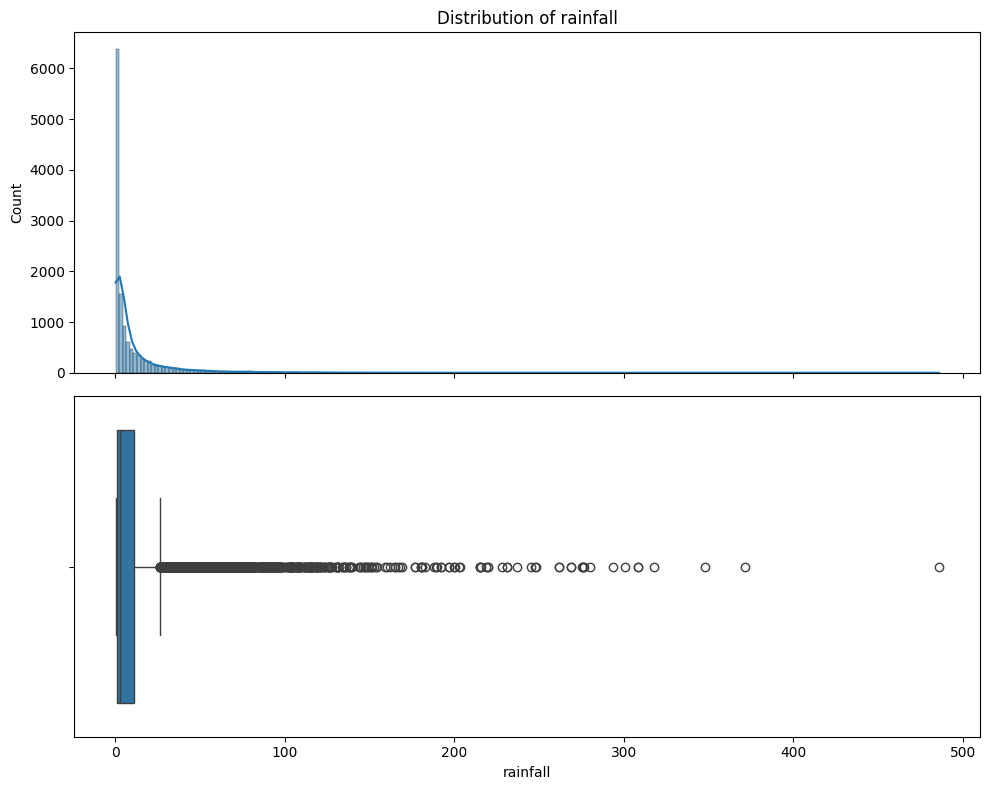

In [23]:
for col in numeric_cols:
    numerical_univariate(dataset, col)


# -------------------------------------------------------------------------------------------
# Observation :

# feature name : 'avg_temp'
# 1) mean and median value close to each other that means less possible of outliers.
# 2) skewness approx -0.4 i.e. data is slightly left skewed.
# 3) avg_temp most values in range 23 to 32.
# 4) In boxplot, values less than 17 and values greater than 37 are consider outliers.

# feature name : 'min_temp'
# 1) mean and median value close to each other that means less possible of outliers.
# 2) skewness value -0.75 i.e. data is slightly left skewed.
# 3) In boxplot, values less than 8 are consider as outliers.

# feature name : 'max_temp'
# 1) mean and median values are very close to each other i.e. less possible of outliers.
# 2) skewness 0.34 i.e. data slightly right skewed.
# 3) In boxplot, values less than 22 and values greater than 43 are consider as outliers.

# feature name : 'wind_speed'
# 1) Difference between mean and median not much but difference between 75% and max value is greater. so, may be outliers possible.
# 2) skewness 1.26 i.e. data is right skewed.

# feature name : 'air_pressure'
# 1) mean and median is close to each other may be no or less outliers.
# 2) skewness -0.28 slightly left skewed and data distribution looks like bimodal.

# feature name : 'elevation'
# 1) mean and median difference is not close to each other, may be outliers possible.
# 2) skewness is about 1.51 and distribution looks like multimodal.

# feature name : 'rainfall'
# 1) Too much missing values are present in this column.
# 2) min, 25%, 50% are directly 0.
# 3) 75% and max value has large difference. so, may be possible outliers.

# -------------------------------------------------------------------------------------------

### Univariate Analysis for Categorical Columns

In [24]:
def categorical_univariate(dataset, column):
    """
    Visualize and summarize a categorical feature:
    - Print frequency counts and missing values
    - Plot a countplot and a pie chart
    """
    print("-" * 100)
    print(f"Feature Name: {column}\n")

    # 1. Print descriptive stats
    print("Value Counts:")
    print(dataset[column].value_counts(dropna=False))
    print(f"\nMissing Values: {dataset[column].isnull().sum()}")

    # 2. Create plots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Countplot (bar chart)
    sns.countplot(x=column, data=dataset, ax=ax[0], order=dataset[column].value_counts().index)
    ax[0].set_title(f"Countplot of {column}")   
    ax[0].set_xlabel(column)
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis='x', rotation=45)

    # Pie chart
    dataset[column].value_counts(dropna=False).plot.pie(
        autopct='%1.1f%%', ax=ax[1], startangle=90, cmap='tab20'
    )
    ax[1].set_ylabel("") 
    ax[1].set_title(f"Pie Chart of {column}")

    plt.tight_layout()
    plt.show()


----------------------------------------------------------------------------------------------------
Feature Name: month

Value Counts:
month
July         3657
August       3503
September    2453
June         1977
October       767
May           273
March         160
December      152
January       144
November      135
April         105
February        9
Name: count, dtype: int64

Missing Values: 0


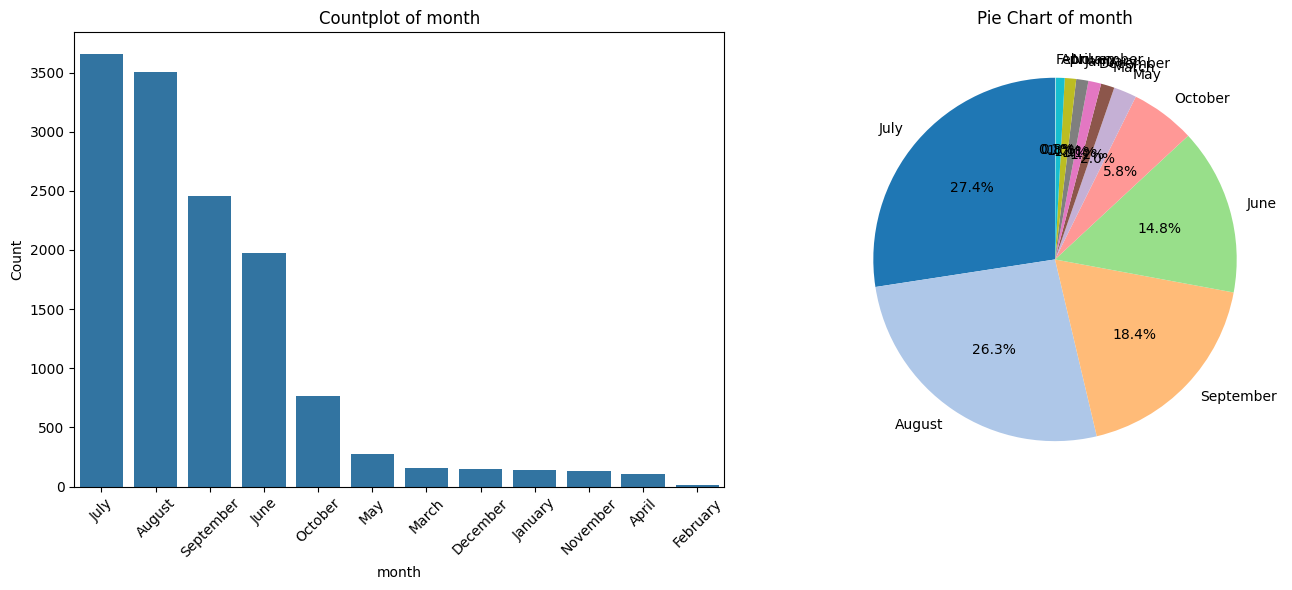

----------------------------------------------------------------------------------------------------
Feature Name: season

Value Counts:
season
Monsoon         9613
Summer          2355
Post-monsoon     902
Winter           465
Name: count, dtype: int64

Missing Values: 0


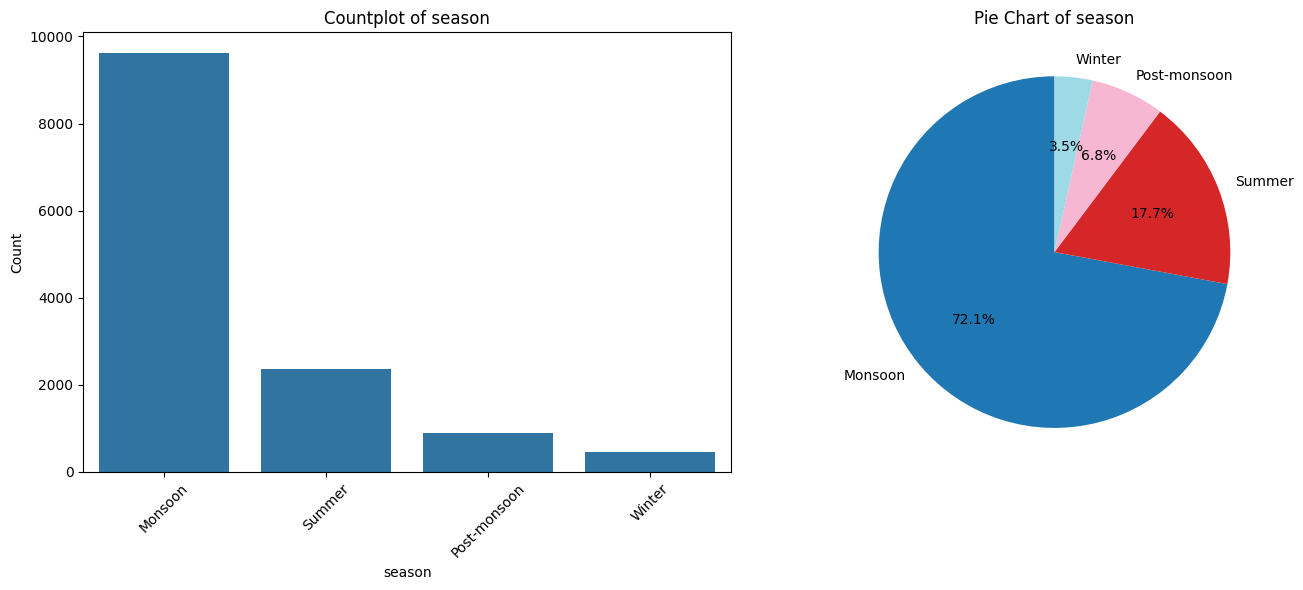

----------------------------------------------------------------------------------------------------
Feature Name: station_name

Value Counts:
station_name
Surat / Magdala       948
Surat                 900
Veraval               735
Gandhinagar           714
Porbandar             658
Ahmadabad             652
Rajkot                611
Bhaunagar             569
Bulsar                537
Dwarka                532
Deesa                 512
Okha                  500
Baroda / Vadodara     493
Baroda Aerodrome      493
Mahuva                491
Vallabh Vidyanagar    464
Bhuj-Rudramata        440
Diu                   436
Naliya                432
Amreli                427
Surendranagar         388
New Kandla            375
Kandla Aerodrome      367
Keshod                352
Jamnagar              309
Name: count, dtype: int64

Missing Values: 0


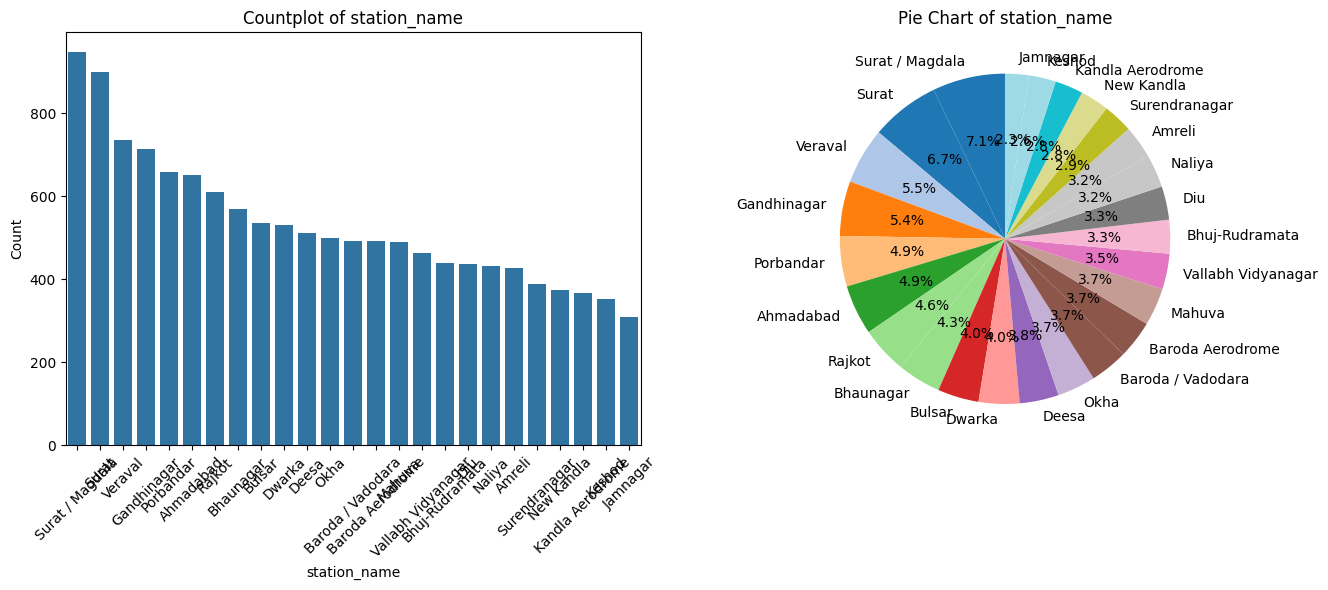

----------------------------------------------------------------------------------------------------
Feature Name: state

Value Counts:
state
GJ    13335
Name: count, dtype: int64

Missing Values: 0


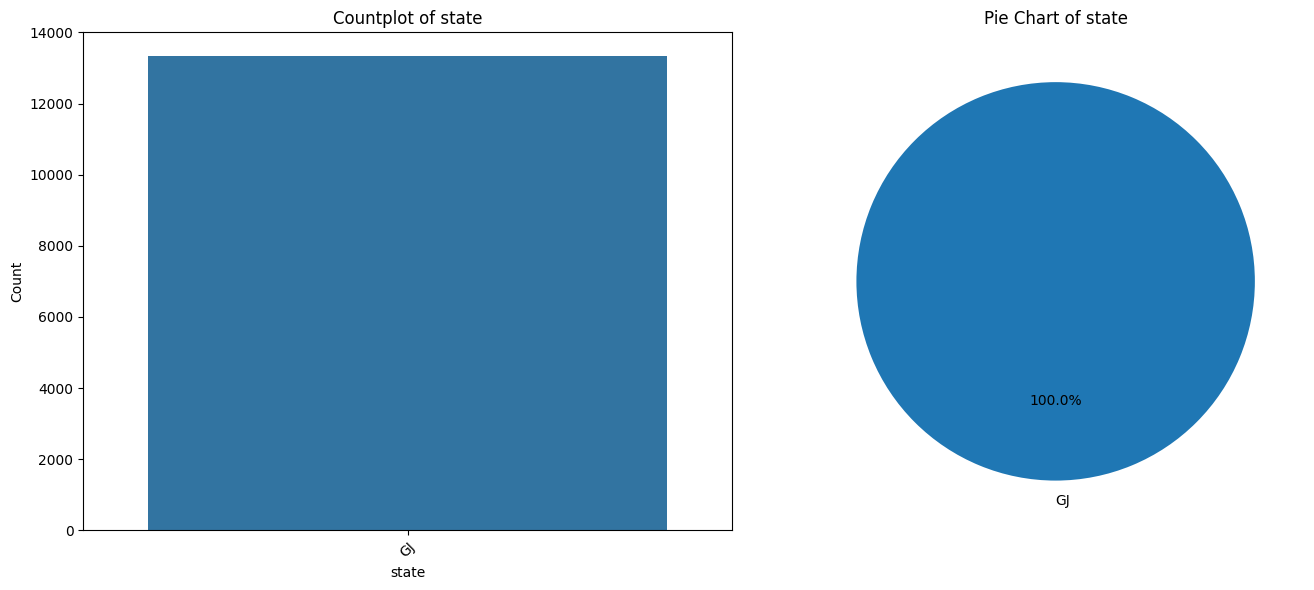

----------------------------------------------------------------------------------------------------
Feature Name: district

Value Counts:
district
Surat              1848
Kachchh            1614
Gir Somnath        1087
Bhavnagar          1060
Devbhumi Dwarka    1032
Vadodara            986
Gandhinagar         714
Porbandar           658
Ahmedabad           652
Rajkot              611
Valsad              537
Banaskantha         512
Anand               464
Diu                 436
Amreli              427
Surendranagar       388
Jamnagar            309
Name: count, dtype: int64

Missing Values: 0


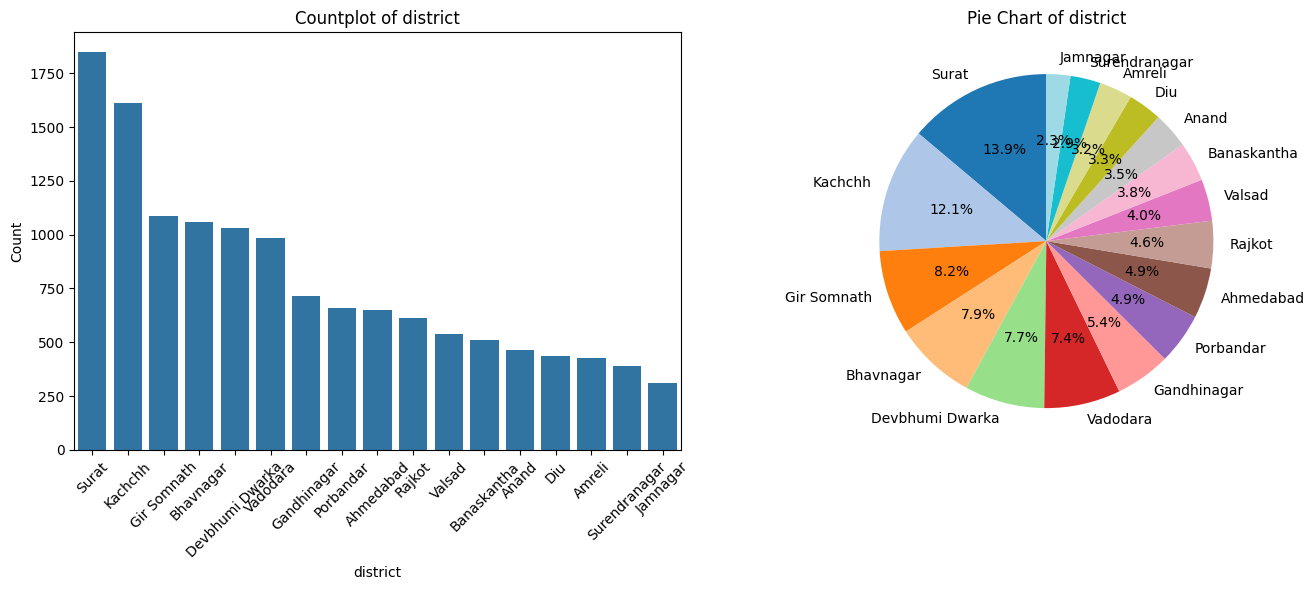

In [25]:
for col in categorical_cols:
    categorical_univariate(dataset, col)

# -------------------------------------------------------------------------------------------
# Observation :

# feature name : month
# 1) each month has approx 4800 to 5900 records and no missing values.

# feature name : season
# 1) winter season have about 21000 records, post-monsoon season have about 10000 records.
# 2) monsoon and summer season have about 15000 records.

# feature name : station_name
# 1) Data collected from about 25 different stations with different districts.

# feature name : district
# 1) Data collected from about 17 different districts from gujarat state.

# -------------------------------------------------------------------------------------------ss

### Bivariate Analysis - Categorical vs Categorical

In [26]:
categorical_cols

Index(['month', 'season', 'station_name', 'state', 'district'], dtype='object')

In [27]:
pd.crosstab(dataset["month"], dataset["season"])

# -------------------------------------------------------------------------------------------
# Observation :
# 1) march is originally summer season but have winter values.
# 2) Most of values 0. due to, this is a month and season distribution.
# -------------------------------------------------------------------------------------------

season     Monsoon  Post-monsoon  Summer  Winter
month                                           
April            0             0     105       0
August        3503             0       0       0
December         0             0       0     152
February         0             0       0       9
January          0             0       0     144
July          3657             0       0       0
June             0             0    1977       0
March            0             0       0     160
May              0             0     273       0
November         0           135       0       0
October          0           767       0       0
September     2453             0       0       0

<Axes: xlabel='season', ylabel='month'>

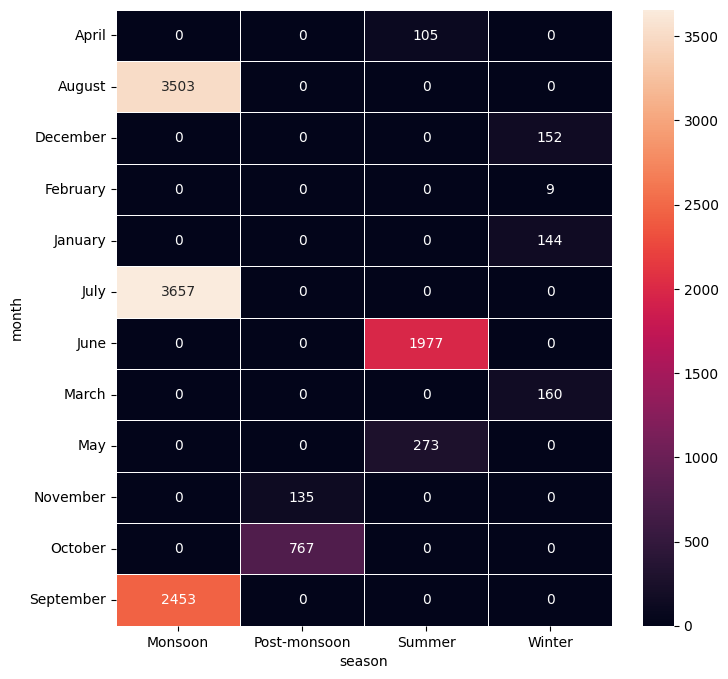

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.crosstab(dataset["month"], dataset["season"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [29]:
pd.crosstab(dataset["month"], dataset["station_name"])

# -------------------------------------------------------------------------------------------
# Observation :
# 1) "station_name" such as amreli, vadodara, baroda aerodrome, bulsar, diu, jamnagar, kandla aerodrome, keshod, mahuva, new kandla, surendranagar, vallabh vidyanagar has less observations compare to all other stations.
# -------------------------------------------------------------------------------------------

station_name  Ahmadabad  Amreli  Baroda / Vadodara  Baroda Aerodrome  \
month                                                                  
April                 4       3                  4                 4   
August              193     102                116               116   
December             10       7                 10                10   
February              0       0                  1                 1   
January               9       4                 10                10   
July                175     113                118               118   
June                 83      58                 73                73   
March                13       5                  6                 6   
May                   9       8                 10                10   
November              4       6                  7                 7   
October              28      34                 38                38   
September           124      87                100               100   

station_name  Bhaunagar  Bhuj-Rudramata  Bulsar  Deesa  Diu  Dwarka  \
month                                                                 
April                 6               3       1      2    1       3   
August              139             128     119    154  107     171   
December              5               2       8      4    4       4   
February              0               0       0      3    0       1   
January               6               5       3      5    4       7   
July                153             140     124    148  120     148   
June                 92              49      90     63   81      67   
March                 9               5       5      7    0       6   
May                  11               9      13      9   11       6   
November              5               3       9      5    6       4   
October              39              17      53     22   25      24   
September           104              79     112     90   77      91   

station_name  Gandhinagar  Jamnagar  Kandla Aerodrome  Keshod  Mahuva  Naliya  \
month                                                                           
April                   5         3                11       7       3       5   
August                217        76                81      89     109     133   
December                9         2                 2       2       4       4   
February                0         0                 0       0       0       1   
January                10         4                 4       0       2       5   
July                  200        91               113      93     119     133   
June                   81        45                54      57      83      59   
March                  12         5                 4       4       8       6   
May                     9        11                12      11      12       4   
November                5         3                 4       1       5       0   
October                33        15                17      21      43      15   
September             133        54                65      67     103      67   

station_name  New Kandla  Okha  Porbandar  Rajkot  Surat  Surat / Magdala  \
month                                                                       
April                  3     2         11       5      6                1   
August                93   166        192     155    224              237   
December               3     1          4       8     14               12   
February               0     0          0       0      0                0   
January                4     7          4       6      8                7   
July                 114   160        184     172    243              256   
June                  68    62         95     100    147              158   
March                  4     5          8       8      9                4   
May                    9     2         17      12     15               20   
November      

<Axes: xlabel='station_name', ylabel='month'>

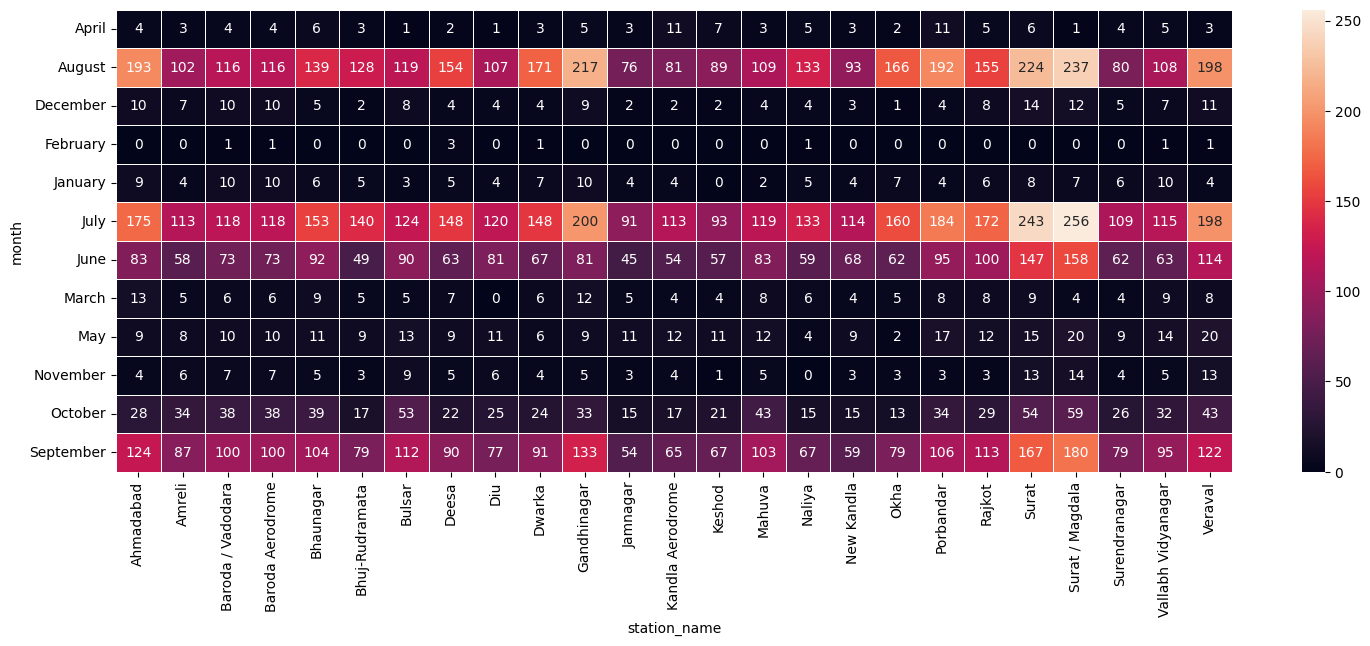

In [30]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["month"], dataset["station_name"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [31]:
pd.crosstab(dataset["month"], dataset["district"])

# -------------------------------------------------------------------------------------------
# Observation :
# 1) 'kachchh' district have most records than all other districts.
# -------------------------------------------------------------------------------------------

district   Ahmedabad  Amreli  Anand  Banaskantha  Bhavnagar  Devbhumi Dwarka  \
month                                                                          
April              4       3      5            2          9                5   
August           193     102    108          154        248              337   
December          10       7      7            4          9                5   
February           0       0      1            3          0                1   
January            9       4     10            5          8               14   
July             175     113    115          148        272              308   
June              83      58     63           63        175              129   
March             13       5      9            7         17               11   
May                9       8     14            9         23                8   
November           4       6      5            5         10                7   
October           28      34     32           22         82               37   
September        124      87     95           90        207              170   

district   Diu  Gandhinagar  Gir Somnath  Jamnagar  Kachchh  Porbandar  \
month                                                                    
April        1            5           10         3       22         11   
August     107          217          287        76      435        192   
December     4            9           13         2       11          4   
February     0            0            1         0        1          0   
January      4           10            4         4       18          4   
July       120          200          291        91      500        184   
June        81           81          171        45      230         95   
March        0           12           12         5       19          8   
May         11            9           31        11       34         17   
November     6            5           14         3       10          3   
October     25           33           64        15       64         34   
September   77          133          189        54      270        106   

district   Rajkot  Surat  Surendranagar  Vadodara  Valsad  
month                                                      
April           5      7              4         8       1  
August        155    461             80       232     119  
December        8     26              5        20       8  
February        0      0              0         2       0  
January         6     15              6        20       3  
July          172    499            109       236     124  
June          100    305             62       146      90  
March           8     13              4        12       5  
May            12     35              9        20      13  
November        3     27              4        14       9  
October        29    113             26        76      53  
September     113    347             79       200     112

<Axes: xlabel='district', ylabel='month'>

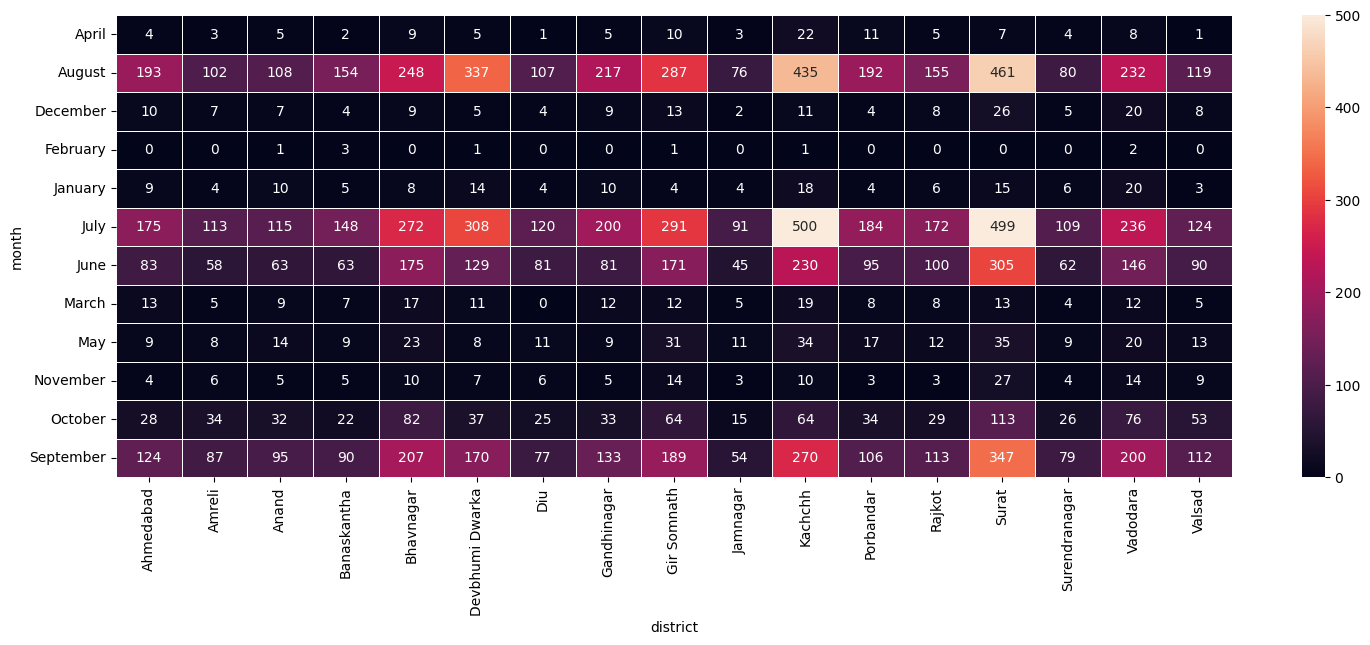

In [32]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["month"], dataset["district"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [33]:
pd.crosstab(dataset["season"], dataset["station_name"])

# -------------------------------------------------------------------------------------------
# Observation :
# 1) "winter" season with stations ahmadabad, bhaunagar, bhuj-rudramata, dwarka, gandhinagar, naliya, okha, porbandar, rajkot, surat, surat/magdala, veraval have more records than all others.
# 2) Name inconsistency in "Ahmadabad", "Baroda/Vadodara", "Baroda Aerodrome", "Surat", "Surat/Magadala" etc.
# -------------------------------------------------------------------------------------------

station_name  Ahmadabad  Amreli  Baroda / Vadodara  Baroda Aerodrome  \
season                                                                 
Monsoon             492     302                334               334   
Post-monsoon         32      40                 45                45   
Summer               96      69                 87                87   
Winter               32      16                 27                27   

station_name  Bhaunagar  Bhuj-Rudramata  Bulsar  Deesa  Diu  Dwarka  \
season                                                                
Monsoon             396             347     355    392  304     410   
Post-monsoon         44              20      62     27   31      28   
Summer              109              61     104     74   93      76   
Winter               20              12      16     19    8      18   

station_name  Gandhinagar  Jamnagar  Kandla Aerodrome  Keshod  Mahuva  Naliya  \
season                                                                          
Monsoon               550       221               259     249     331     333   
Post-monsoon           38        18                21      22      48      15   
Summer                 95        59                77      75      98      68   
Winter                 31        11                10       6      14      16   

station_name  New Kandla  Okha  Porbandar  Rajkot  Surat  Surat / Magdala  \
season                                                                      
Monsoon              266   405        482     440    634              673   
Post-monsoon          18    16         37      32     67               73   
Summer                80    66        123     117    168              179   
Winter                11    13         16      22     31               23   

station_name  Surendranagar  Vallabh Vidyanagar  Veraval  
season                                                    
Monsoon                 268                 318      518  
Post-monsoon             30                  37       56  
Summer                   75                  82      137  
Winter                   15                  27       24

<Axes: xlabel='station_name', ylabel='season'>

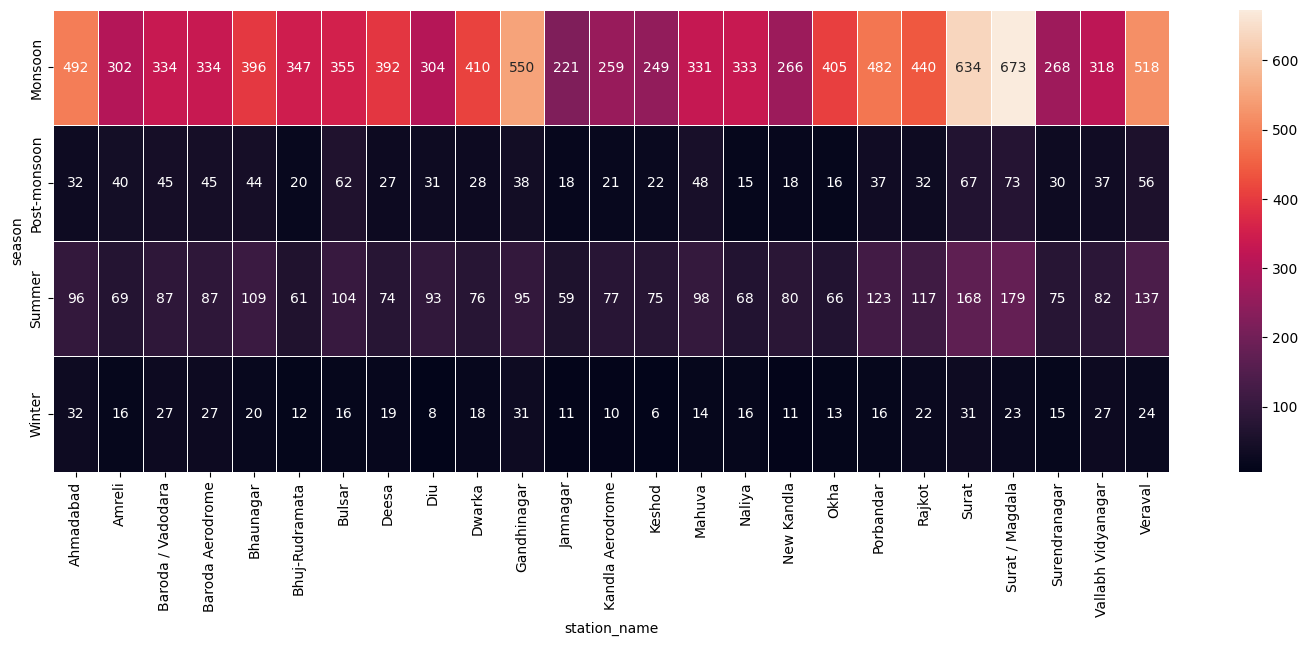

In [34]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["season"], dataset["station_name"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

In [35]:
pd.crosstab(dataset["season"], dataset["district"])

# -------------------------------------------------------------------------------------------
# Observation :
# 1) "kachchh" district have more observations than all other districts.
# -------------------------------------------------------------------------------------------

district      Ahmedabad  Amreli  Anand  Banaskantha  Bhavnagar  \
season                                                           
Monsoon             492     302    318          392        727   
Post-monsoon         32      40     37           27         92   
Summer               96      69     82           74        207   
Winter               32      16     27           19         34   

district      Devbhumi Dwarka  Diu  Gandhinagar  Gir Somnath  Jamnagar  \
season                                                                   
Monsoon                   815  304          550          767       221   
Post-monsoon               44   31           38           78        18   
Summer                    142   93           95          212        59   
Winter                     31    8           31           30        11   

district      Kachchh  Porbandar  Rajkot  Surat  Surendranagar  Vadodara  \
season                                                                     
Monsoon          1205        482     440   1307            268       668   
Post-monsoon       74         37      32    140             30        90   
Summer            286        123     117    347             75       174   
Winter             49         16      22     54             15        54   

district      Valsad  
season                
Monsoon          355  
Post-monsoon      62  
Summer           104  
Winter            16

<Axes: xlabel='district', ylabel='season'>

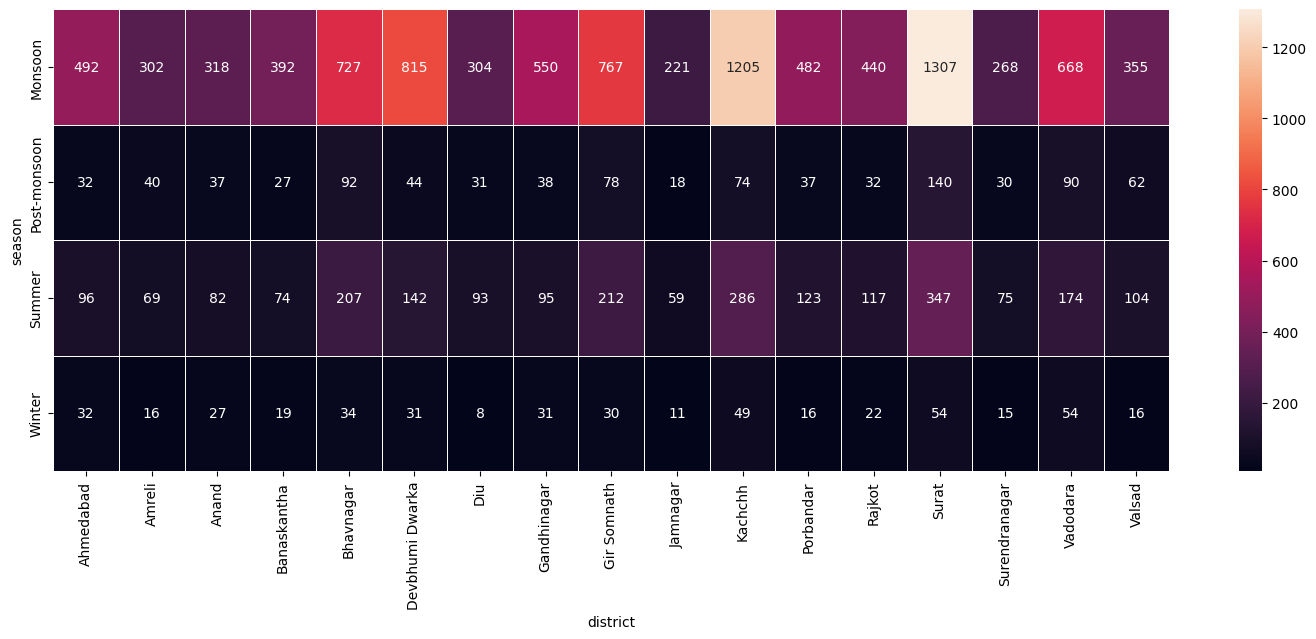

In [36]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(dataset["season"], dataset["district"]), annot=True, fmt="d", linewidths=0.5, linecolor="white")

### Bivariate Analysis - Numerical vs Numerical

In [37]:
col1 = "rainfall"
col2 = numeric_cols.drop("rainfall")

num_col_combination = []

for col in col2:
    num_col_combination.append((col, col1))

num_col_combination

[('avg_temp', 'rainfall'),
 ('min_temp', 'rainfall'),
 ('max_temp', 'rainfall'),
 ('wind_speed', 'rainfall'),
 ('air_pressure', 'rainfall'),
 ('elevation', 'rainfall'),
 ('latitude', 'rainfall'),
 ('longitude', 'rainfall')]

In [38]:
def num_num_bivariate(dataset, col1, col2):

    print("-" * 100)
    print(f"Feature Name: {col1} and {col2}\n")

    fig, ax = plt.subplots(1,1)
    sns.scatterplot(data = dataset, x = col1, y = col2)
    ax.set_title(f"Scatter Plot of {col1} and {col2}")
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

----------------------------------------------------------------------------------------------------
Feature Name: avg_temp and rainfall



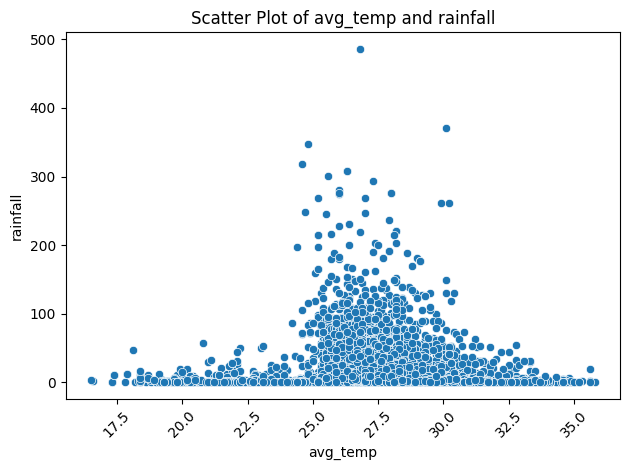

----------------------------------------------------------------------------------------------------
Feature Name: min_temp and rainfall



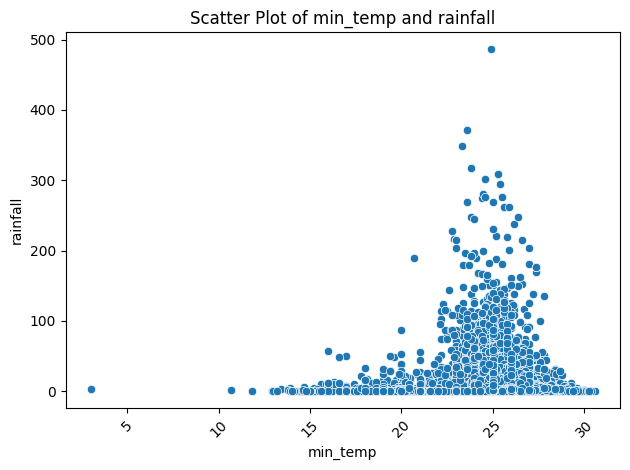

----------------------------------------------------------------------------------------------------
Feature Name: max_temp and rainfall



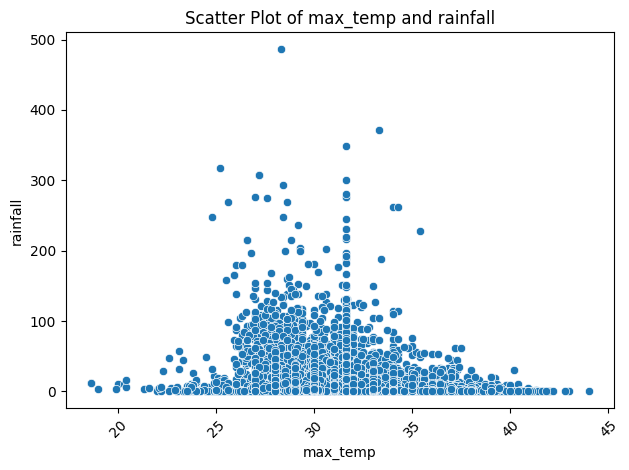

----------------------------------------------------------------------------------------------------
Feature Name: wind_speed and rainfall



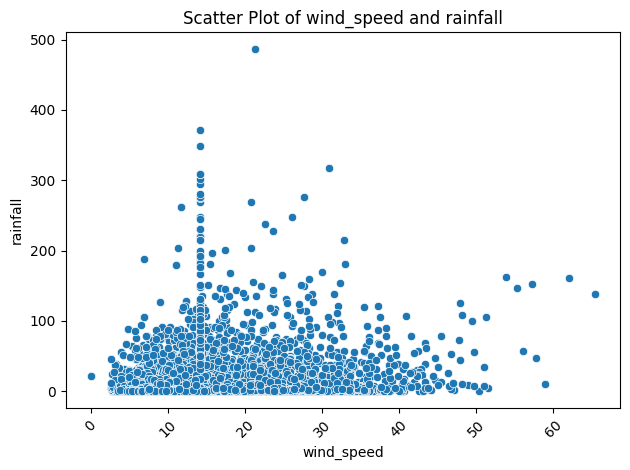

----------------------------------------------------------------------------------------------------
Feature Name: air_pressure and rainfall



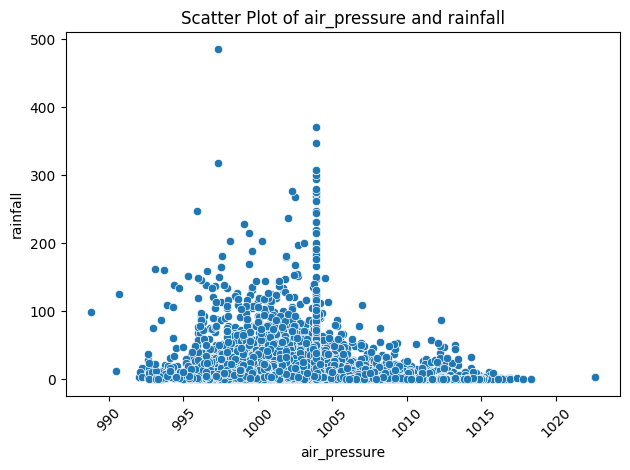

----------------------------------------------------------------------------------------------------
Feature Name: elevation and rainfall



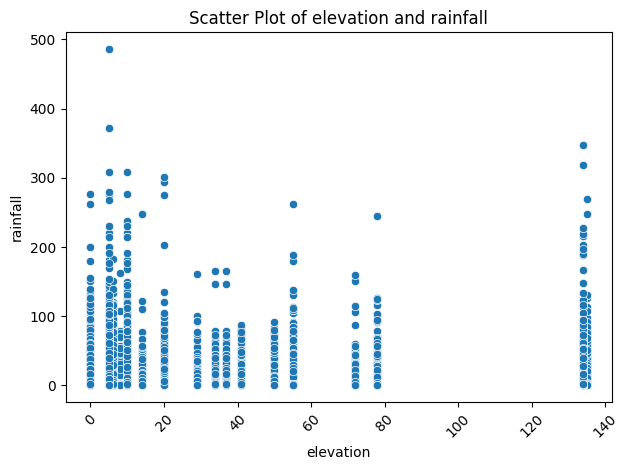

----------------------------------------------------------------------------------------------------
Feature Name: latitude and rainfall



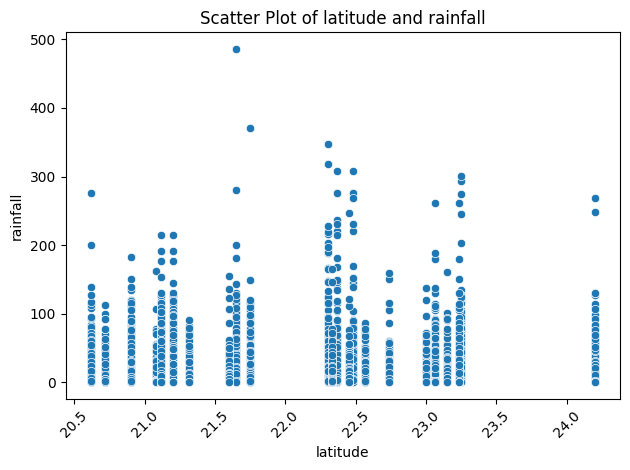

----------------------------------------------------------------------------------------------------
Feature Name: longitude and rainfall



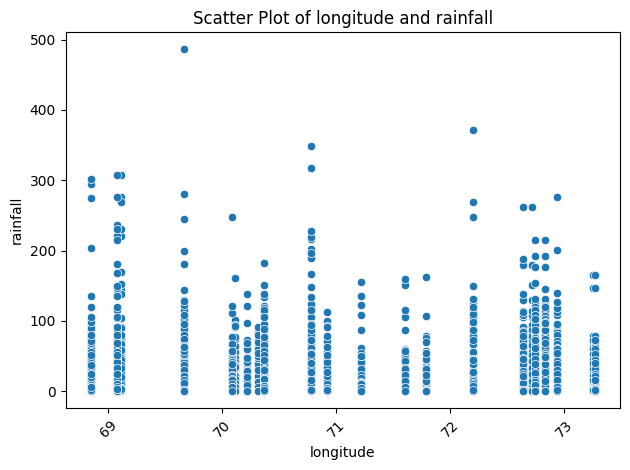

In [39]:
for col1, col2 in num_col_combination:
    num_num_bivariate(dataset, col1, col2)


# -------------------------------------------------------------------------------------------
# Observation :

# feature name : avg_temp and rainfall
# 1) rainfall values varies from 0 to 500 with respective of avg_temp and most of rainfall values are 0.
# 2) avg_temp values range from 12 to 40 degree celsius. 
# 3) There is no direct relation between avg_temp and rainfall.
# 4) avg_temp contains most values in range of 25 to 33 degree celsius.

# feature name : min_temp and rainfall
# 1) min_temp values range from 1 to 32 degree celsius and most of rainfall values are 0.
# 2) min_temp contains most values in range of 20 to 30 degree celsius.

# feature name : max_temp and rainfall
# 1) max_temp values range from 18 to 50 degree celsius.
# 2) max_temp most values in range of 25 to 35 with resp to rainfall.

# feature name : wind_speed and rainfall
# 1) wind_speed values range from 0 to 65 and most values in range of 5 to 35.

# feature name : air_pressure and rainfall
# 1) air_pressure values range from 988 to 1022 and most values fall in range of 995 to 1005.

# feature name : elevation and rainfall
# 1) elevation values range from 0 to 135 and elevation most of values less than or equal to 80.

# -------------------------------------------------------------------------------------------

### Bivariate Analysis - Categorical vs Numerical 

In [40]:
col1 = categorical_cols
col2 = "rainfall"

num_cat_combination = []

for col in col1:
    num_cat_combination.append((col, col2))

num_cat_combination

[('month', 'rainfall'),
 ('season', 'rainfall'),
 ('station_name', 'rainfall'),
 ('state', 'rainfall'),
 ('district', 'rainfall')]

In [41]:
def num_cat_bivariate(dataset, col1, col2):

    print("-" * 100)
    print(f"Feature Name: {col1} and {col2}\n")

    # 2. Create plots
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Bar Plot
    sns.barplot(x=col1, y=col2, data=dataset, ax=ax[0])
    ax[0].set_title(f"Barplot of {col1} and {col2}")
    ax[0].set_xlabel(col1)
    ax[0].set_ylabel(col2)
    ax[0].tick_params(axis='x', rotation=45)

    # Box Plot
    sns.boxplot(x=col1, y=col2, data=dataset, ax=ax[1])
    ax[1].set_title(f"Boxplot of {col1} and {col2}")
    ax[1].set_xlabel(col1)
    ax[1].set_ylabel("")  # remove y-label
    ax[1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


----------------------------------------------------------------------------------------------------
Feature Name: month and rainfall



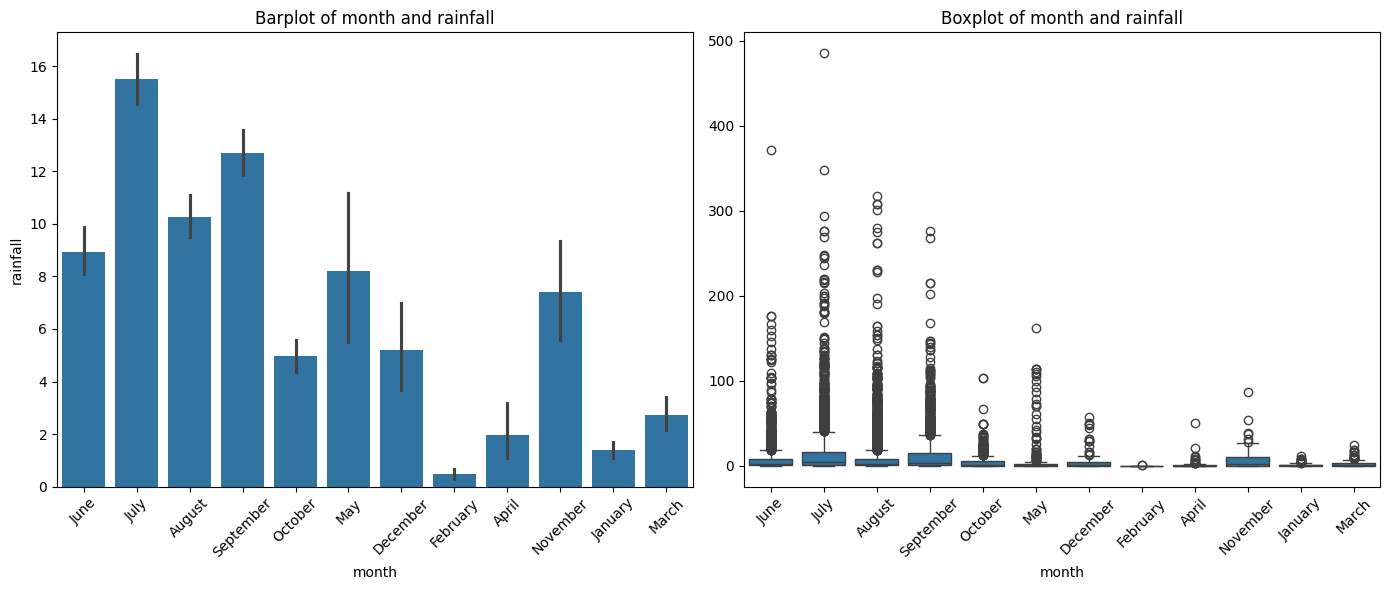

----------------------------------------------------------------------------------------------------
Feature Name: season and rainfall



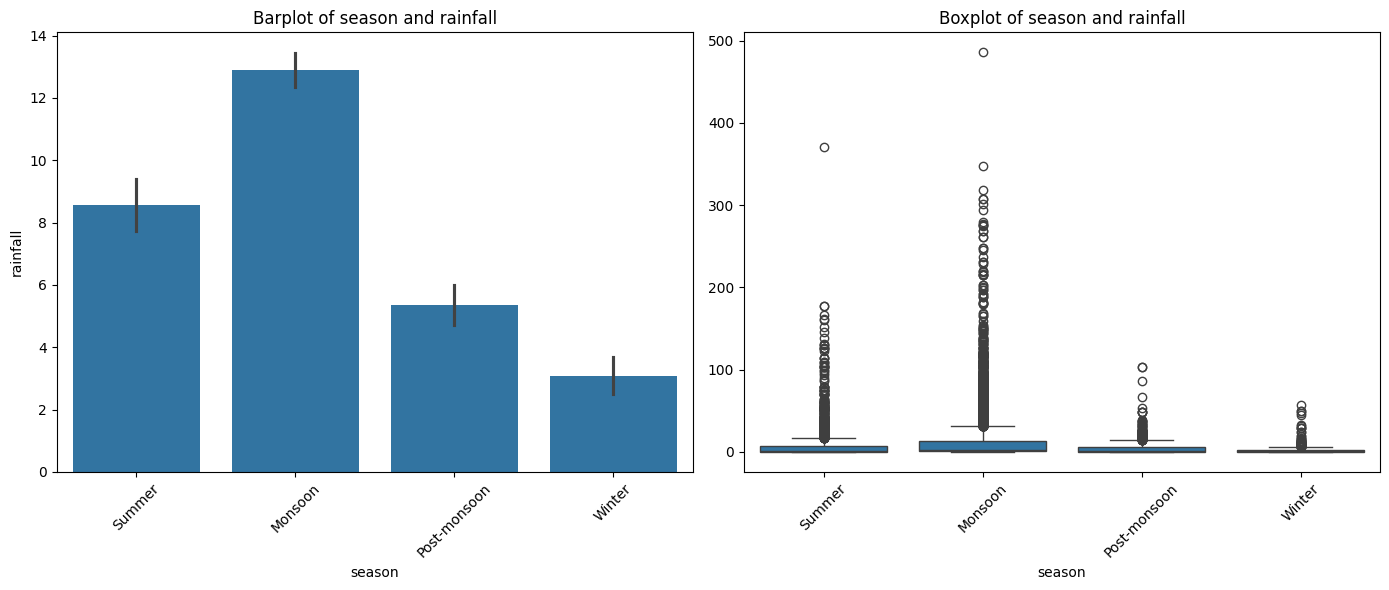

----------------------------------------------------------------------------------------------------
Feature Name: station_name and rainfall



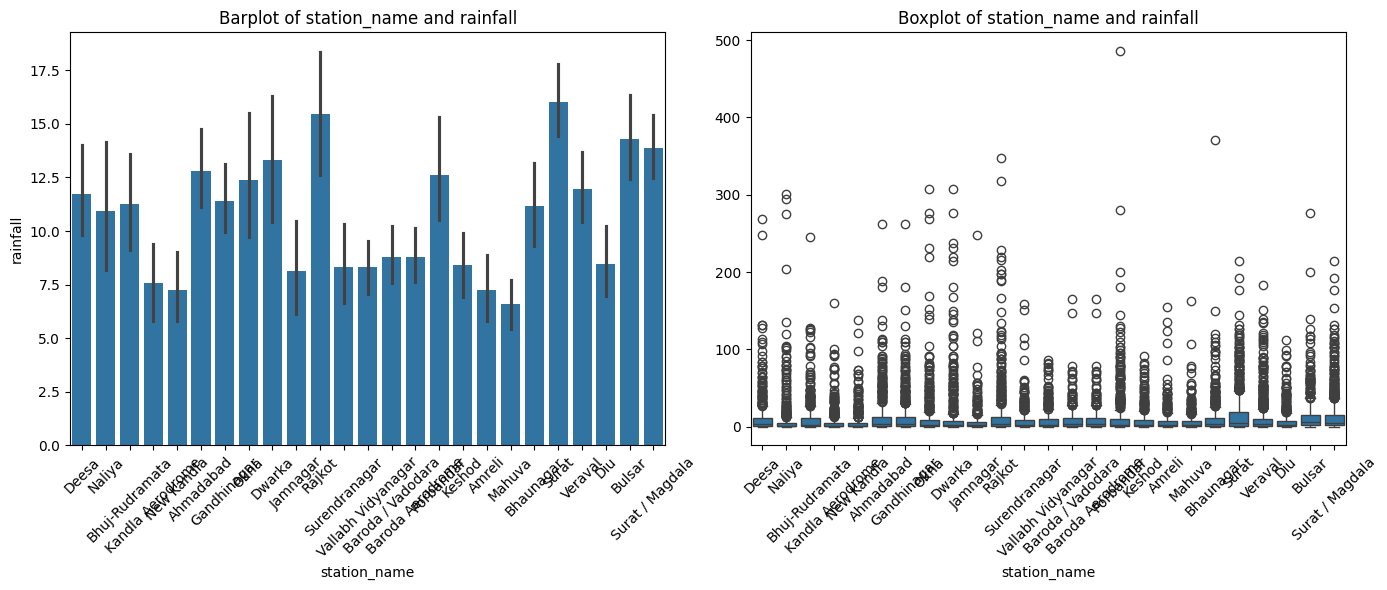

----------------------------------------------------------------------------------------------------
Feature Name: state and rainfall



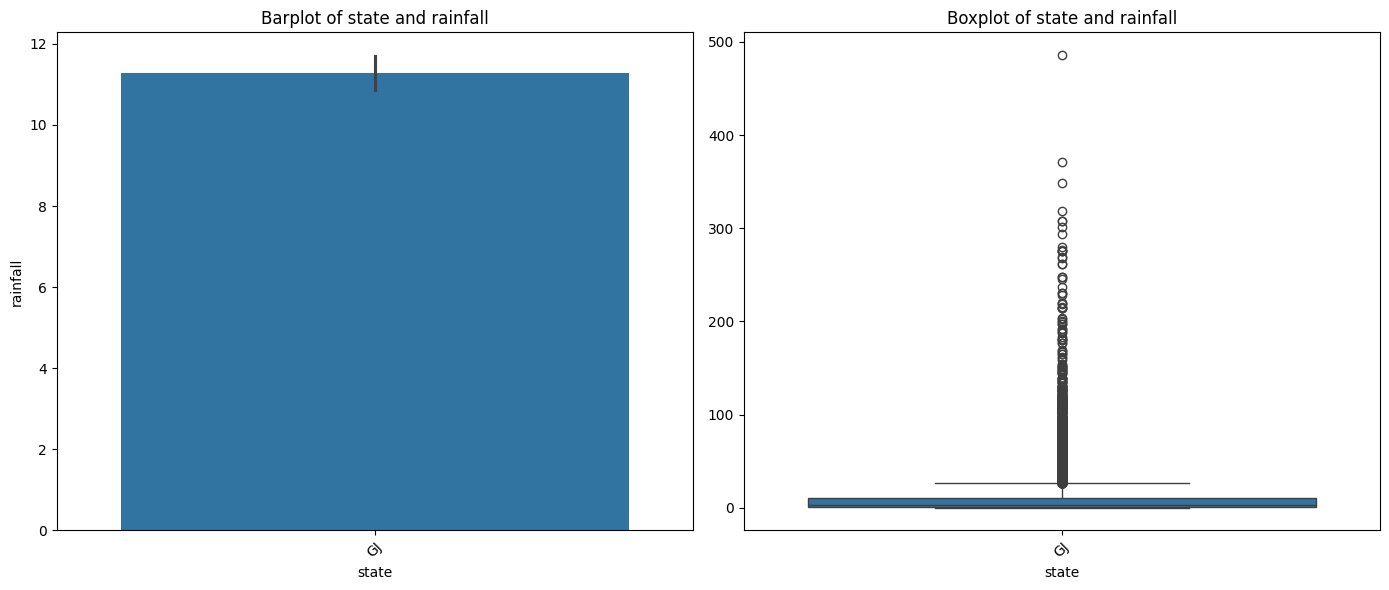

----------------------------------------------------------------------------------------------------
Feature Name: district and rainfall



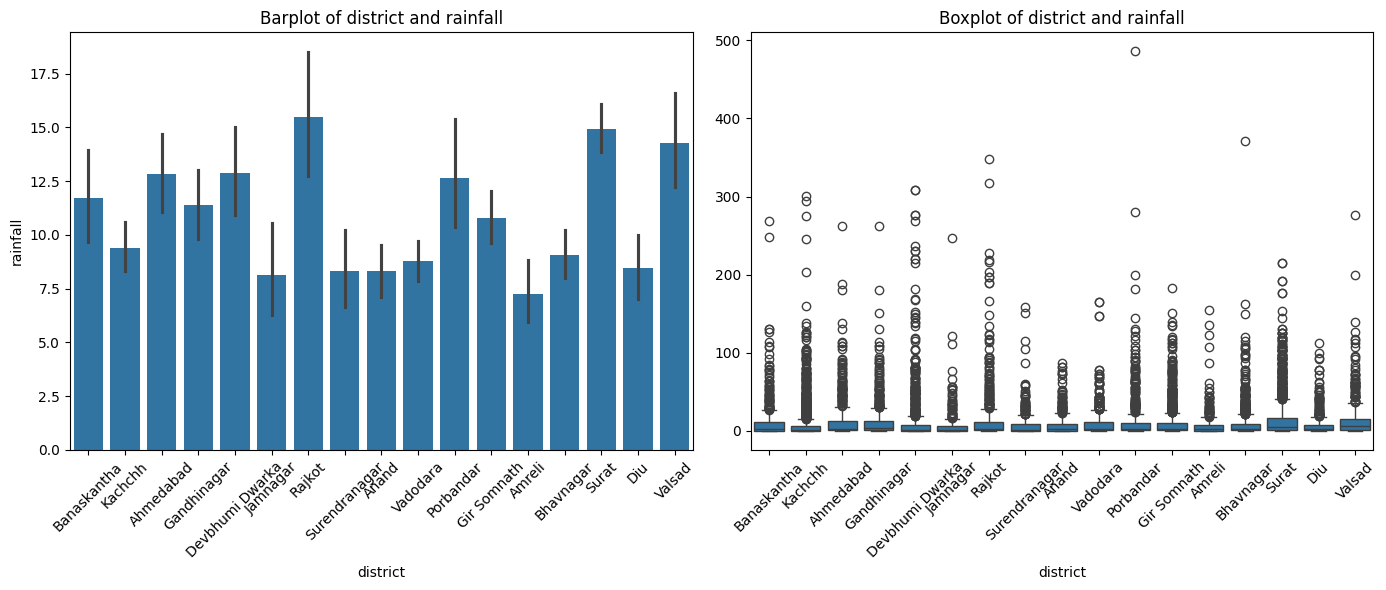

In [42]:
for col1, col2 in num_cat_combination:
    num_cat_bivariate(dataset, col1, col2)


# -------------------------------------------------------------------------------------------
# Observation :

# feature name : month and rainfall
# 1) most of rainfall in june to september months which is valid.
# 2) most of months values are near to 0. for that reason we have outliers in each month.

# feature name : season and rainfall
# 1) summer, winter and post-monsoon seasons contains most of values near to 0 for that reason this season have outliers.
# 2) monsoon season also contains outliers by looking boxplot.

# feature name : station_name and rainfall
# 1) almost every station have most of values near to 0.

# feature name : district and rainfall
# 1) most of districts rainfall values near to 0.

# -------------------------------------------------------------------------------------------

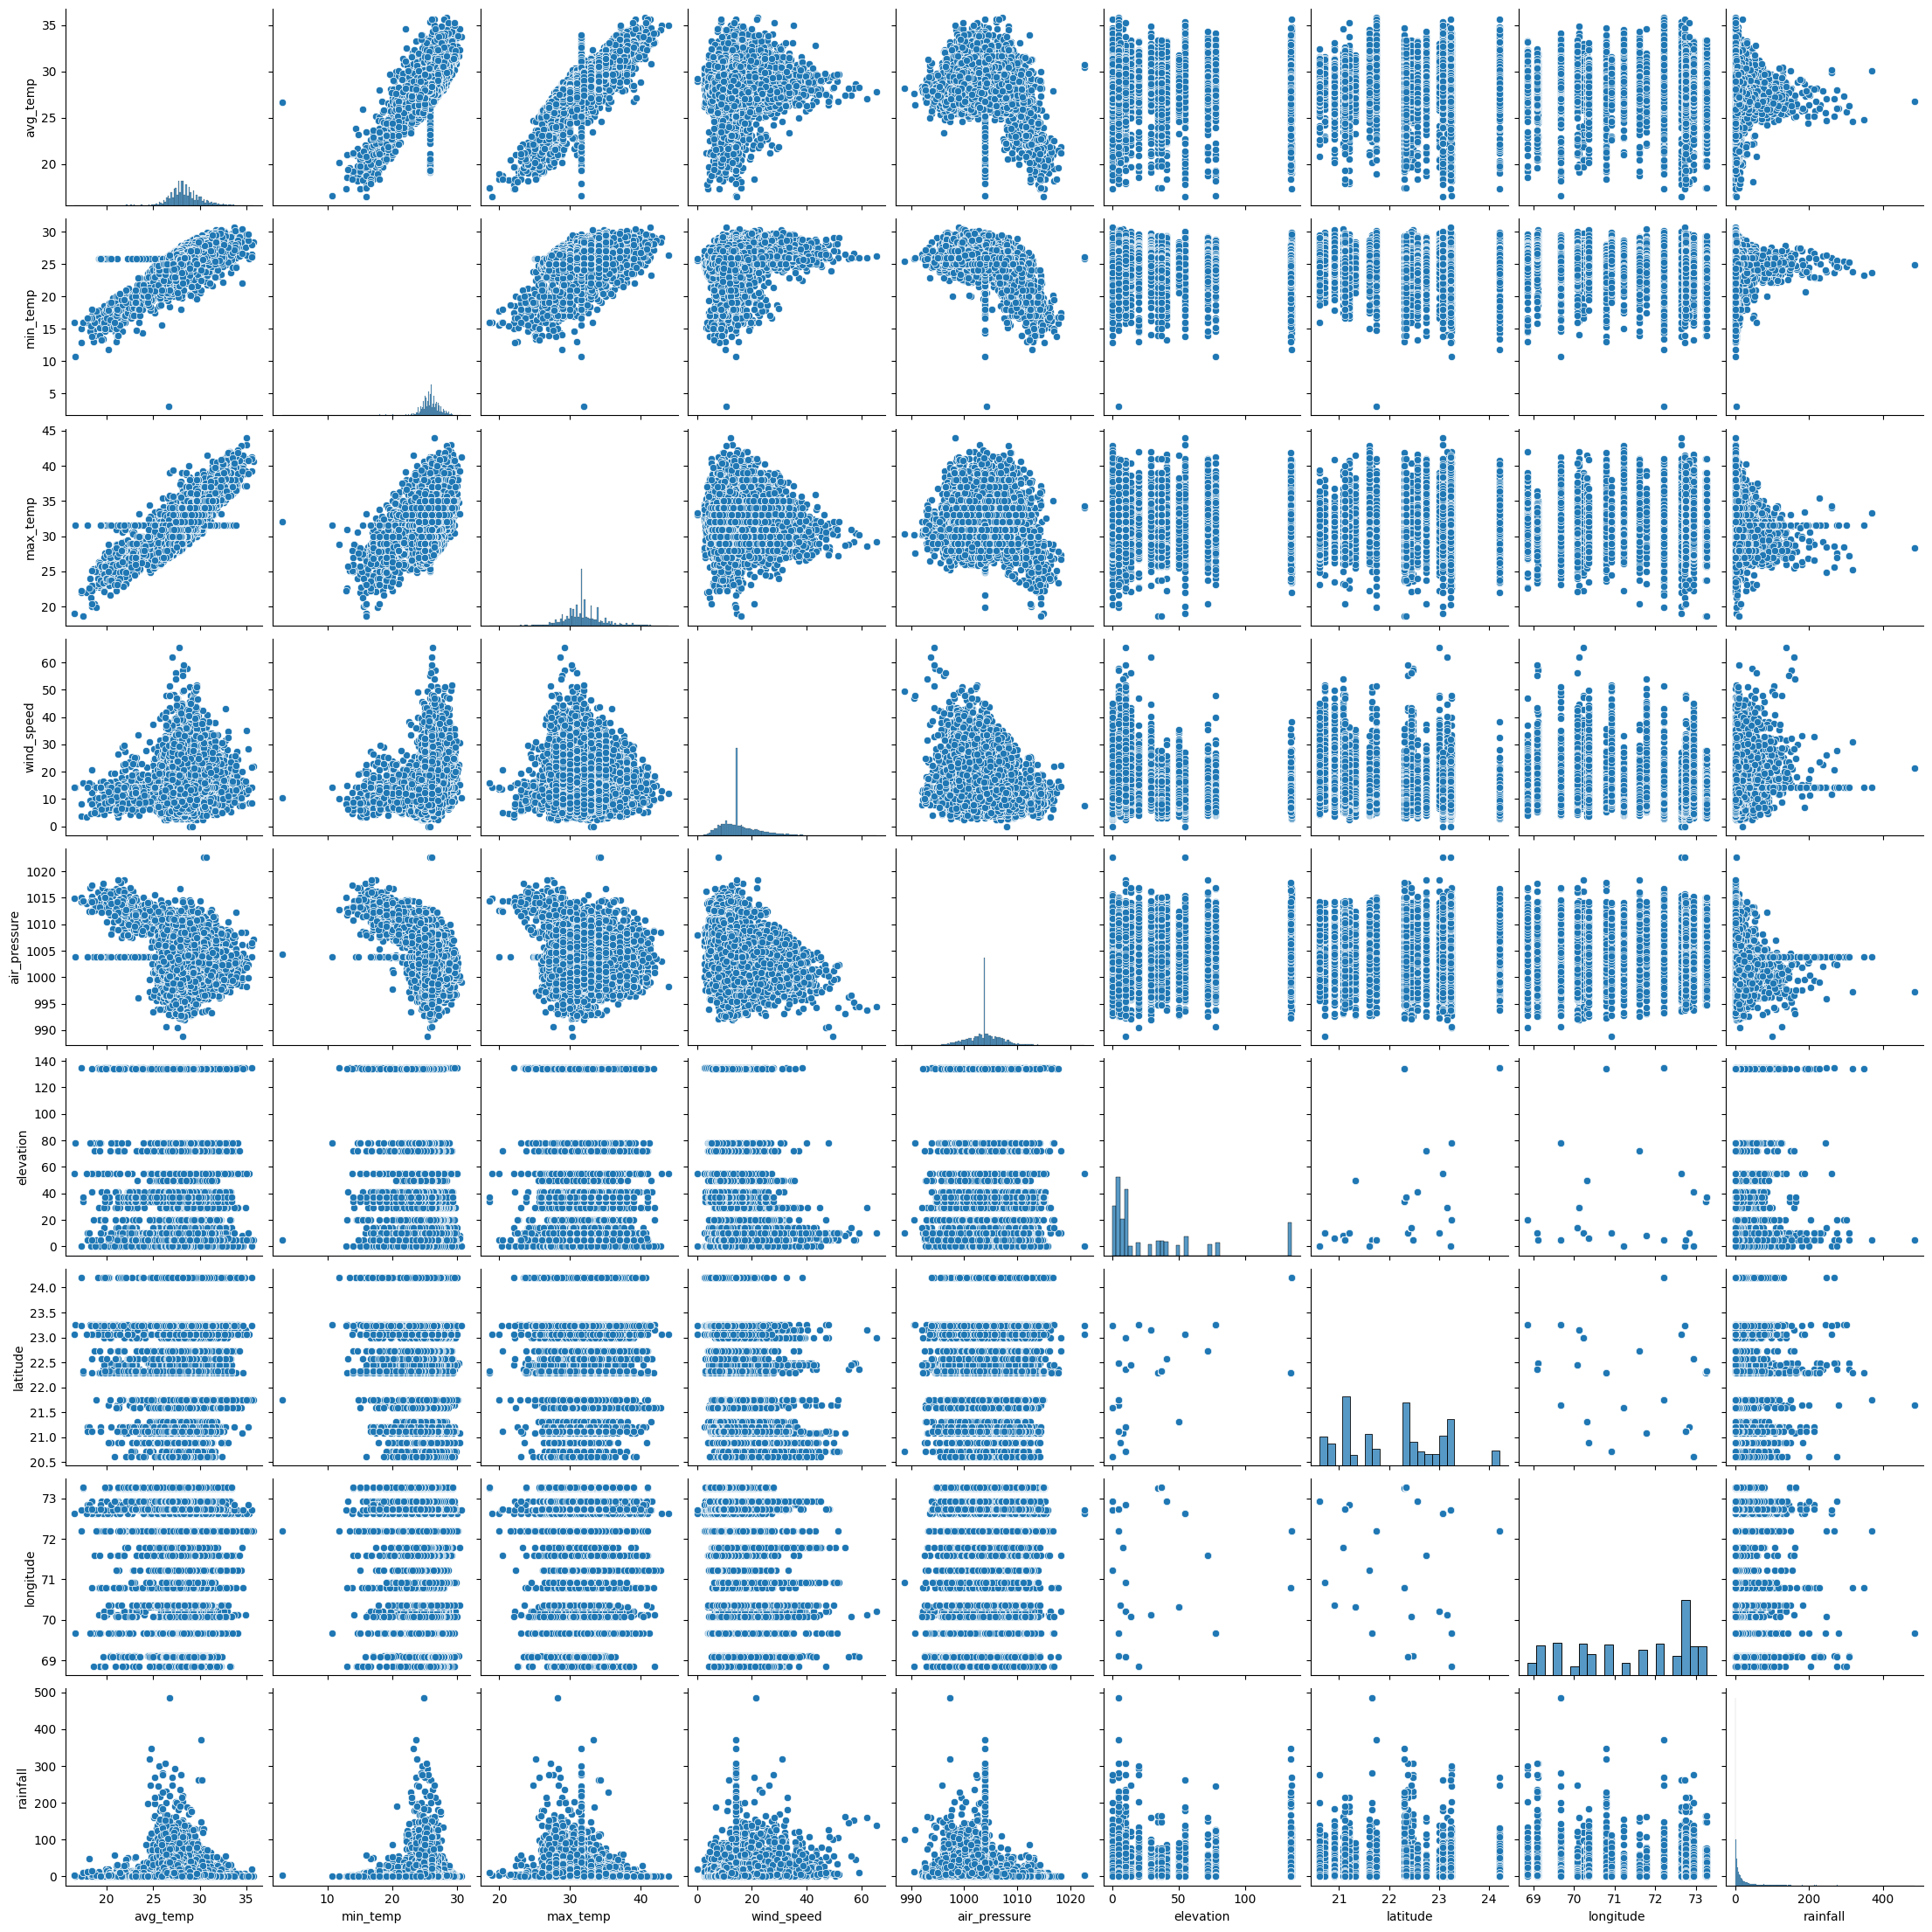

In [43]:
sns.pairplot(dataset)


# -------------------------------------------------------------------------------------------
# Observation :
# 1) sort of linear relation between avg_temp vs min_temp and avg_temp vs max_temp.
# -------------------------------------------------------------------------------------------

In [44]:
corr = dataset[numeric_cols].corr()
corr

# -------------------------------------------------------------------------------------------
# Observation :
# 1) There is strong positive correlation between avg_temp vs min_temp and avg_temp vs max_temp.
# 2) There is negative correlation between avg_temp and air_pressure. also, min_temp and air_pressure.
# -------------------------------------------------------------------------------------------

avg_temp  min_temp  max_temp  wind_speed  air_pressure  \
avg_temp      1.000000  0.729525  0.786792    0.060287     -0.299624   
min_temp      0.729525  1.000000  0.397596    0.301812     -0.488581   
max_temp      0.786792  0.397596  1.000000   -0.171659     -0.081134   
wind_speed    0.060287  0.301812 -0.171659    1.000000     -0.267058   
air_pressure -0.299624 -0.488581 -0.081134   -0.267058      1.000000   
elevation     0.021600 -0.160458  0.151355   -0.212092     -0.057576   
latitude      0.097769 -0.079859  0.202878   -0.218670     -0.151372   
longitude    -0.018984 -0.139823  0.059587   -0.295917      0.063487   
rainfall     -0.194999 -0.111266 -0.232837    0.055101     -0.193419   

              elevation  latitude  longitude  rainfall  
avg_temp       0.021600  0.097769  -0.018984 -0.194999  
min_temp      -0.160458 -0.079859  -0.139823 -0.111266  
max_temp       0.151355  0.202878   0.059587 -0.232837  
wind_speed    -0.212092 -0.218670  -0.295917  0.055101  
air_pressure  -0.057576 -0.151372   0.063487 -0.193419  
elevation      1.000000  0.530044   0.011658  0.010292  
latitude       0.530044  1.000000  -0.137832 -0.021677  
longitude      0.011658 -0.137832   1.000000  0.011665  
rainfall       0.010292 -0.021677   0.011665  1.000000

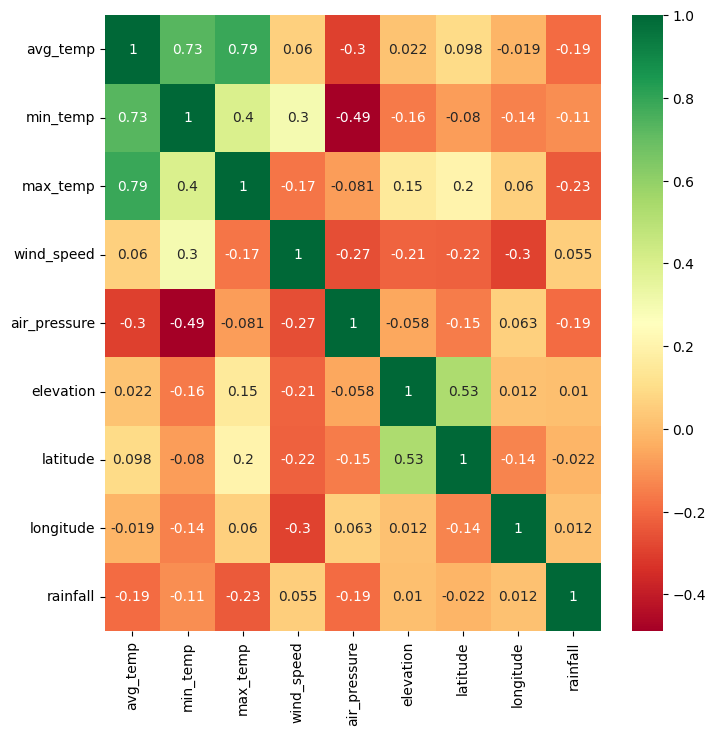

In [45]:
# plot co-relation in heat map to check multi-co-linearility between features
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

### date_of_record

In [46]:
def dt_univar_plots(dataset, var, target=None, bins="auto"):
  fig, ax = plt.subplots(1, 2, figsize=(15, 6))

  # histogram
  sns.histplot(
    data=dataset,
    x=var,
    bins=bins,
    color="#1973bd",
    ax=ax[0]
  )
  ax[0].set_title(f"Histogram for Rainfall in {dataset['date_of_record'].dt.year.values[0]}")
  ax[0].tick_params(axis='x', rotation=45)

  # line-plot
  sns.lineplot(
    data=dataset,
    x=var,
    y=target,
    color="#d92b2b",
    ax=ax[1]
  )
  ax[1].set_title(f"Line Plot for Rainfall in {dataset['date_of_record'].dt.year.values[0]}")
  ax[1].tick_params(axis='x', rotation=45)

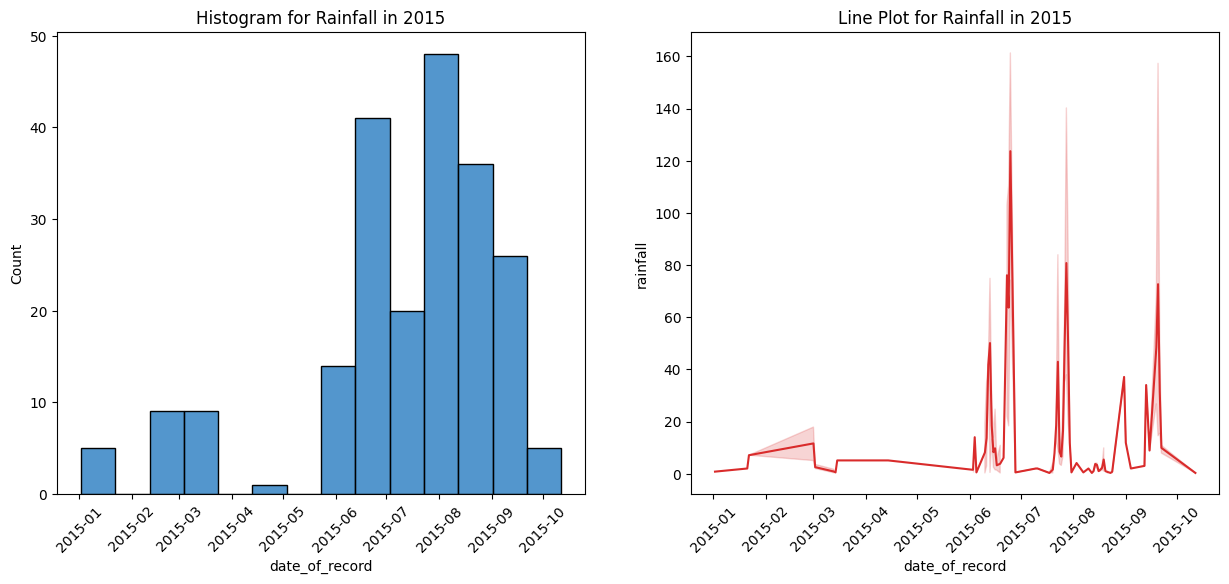

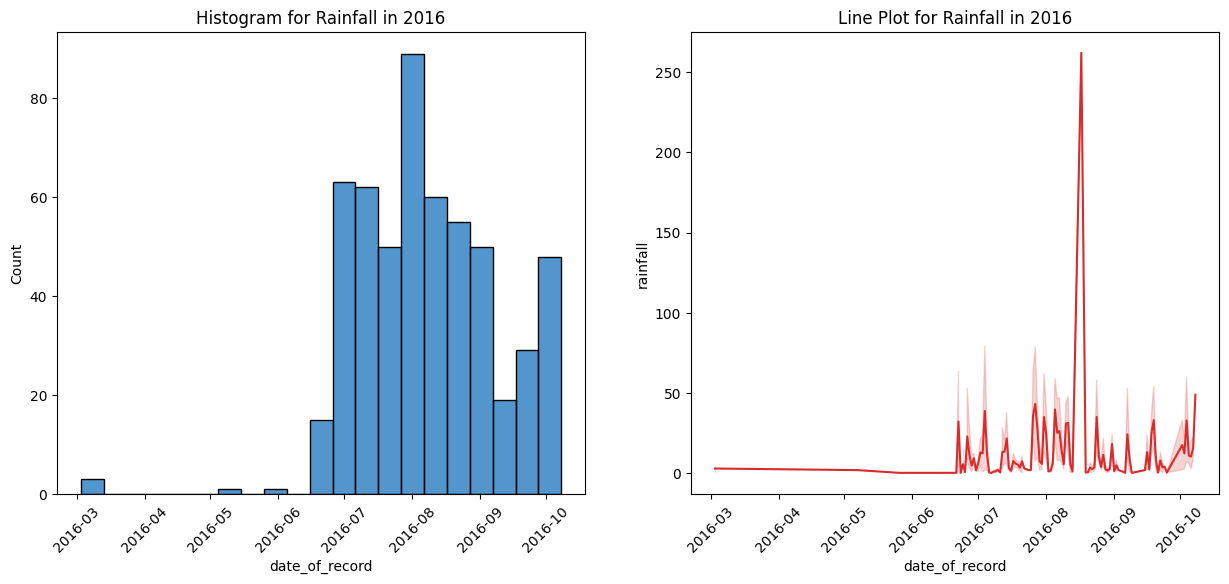

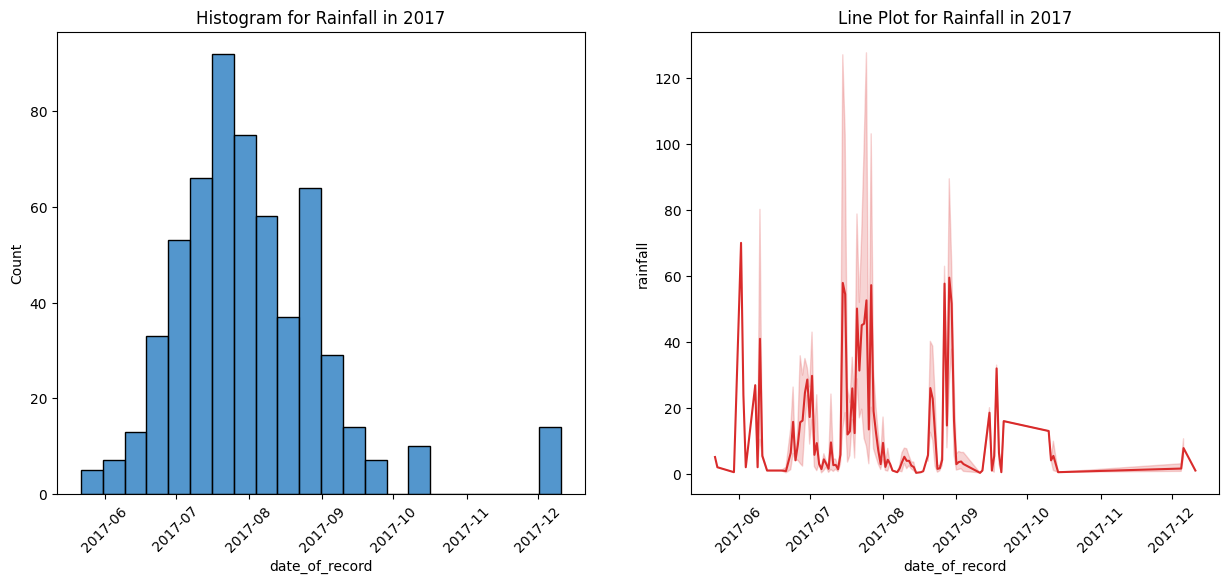

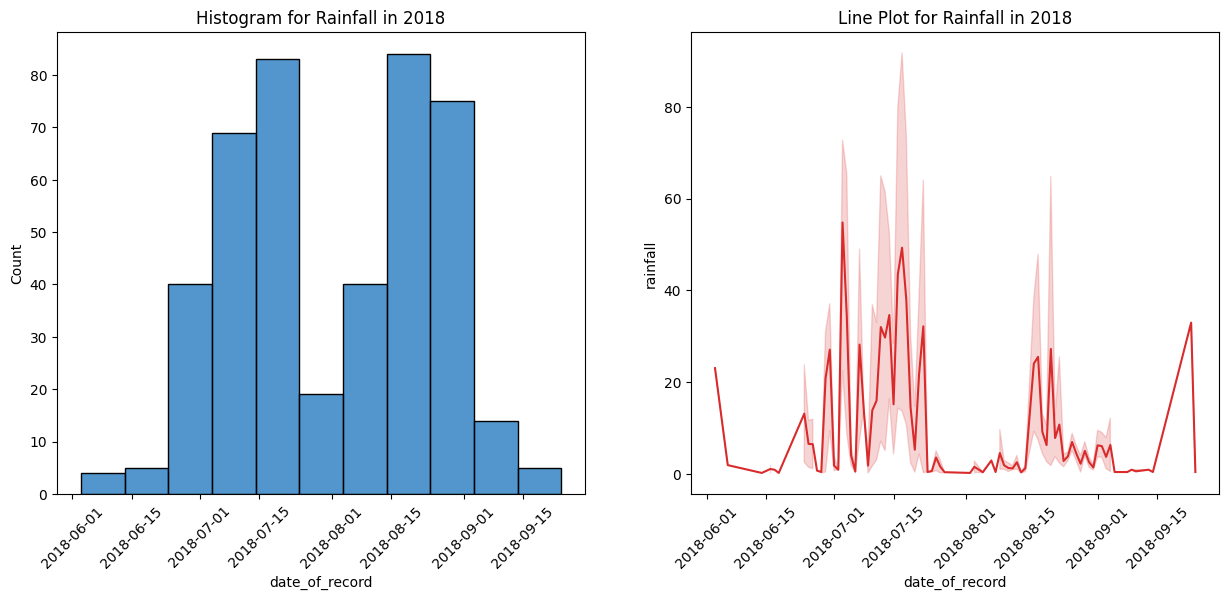

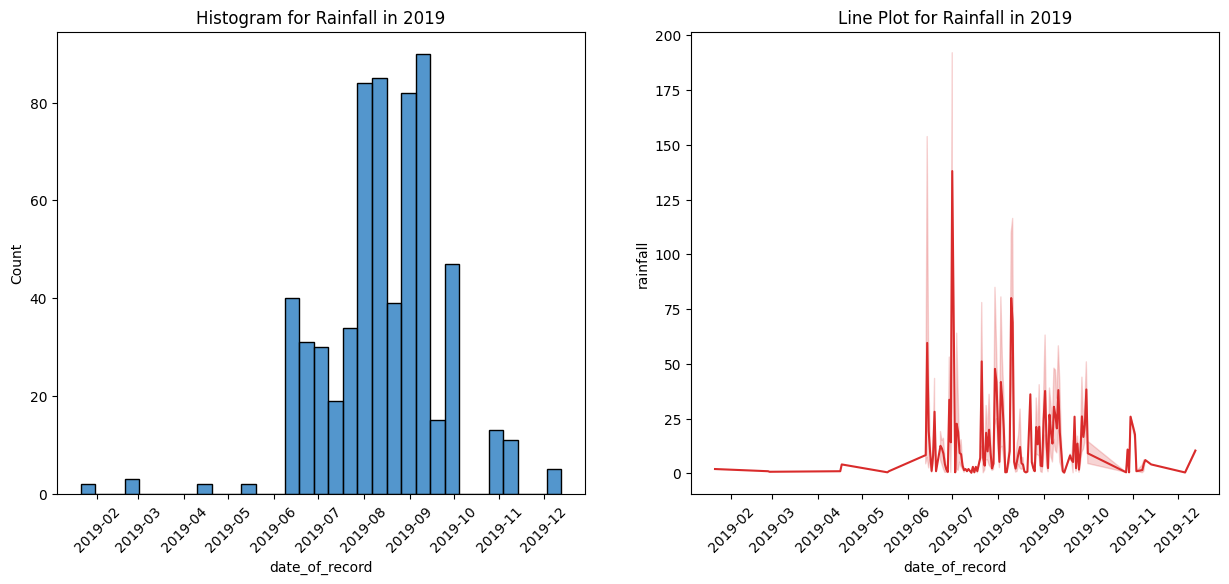

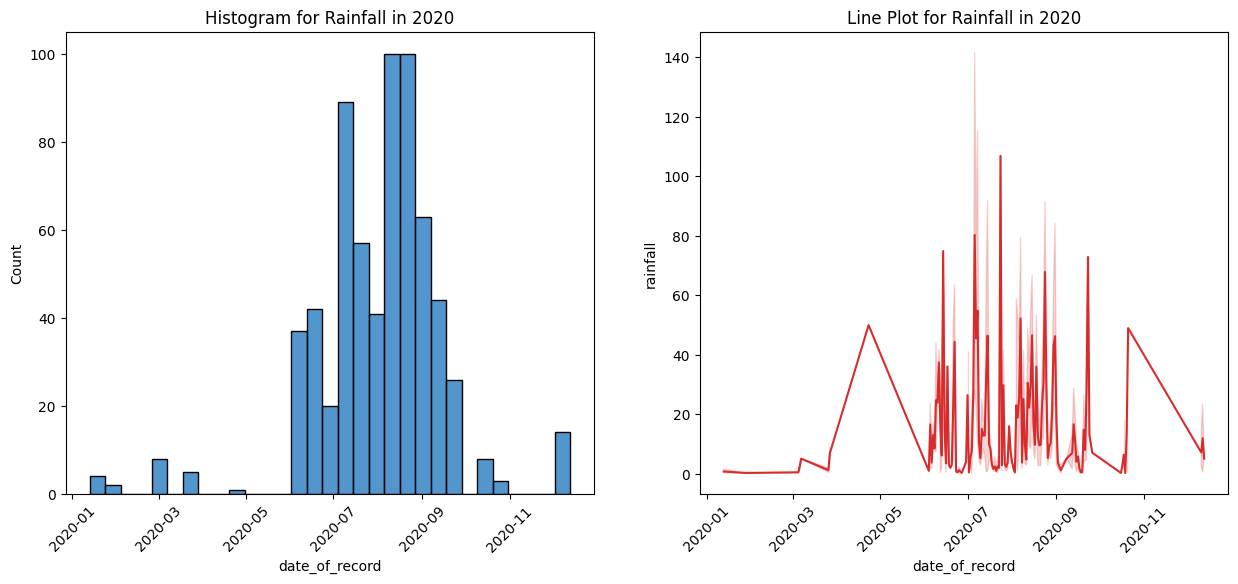

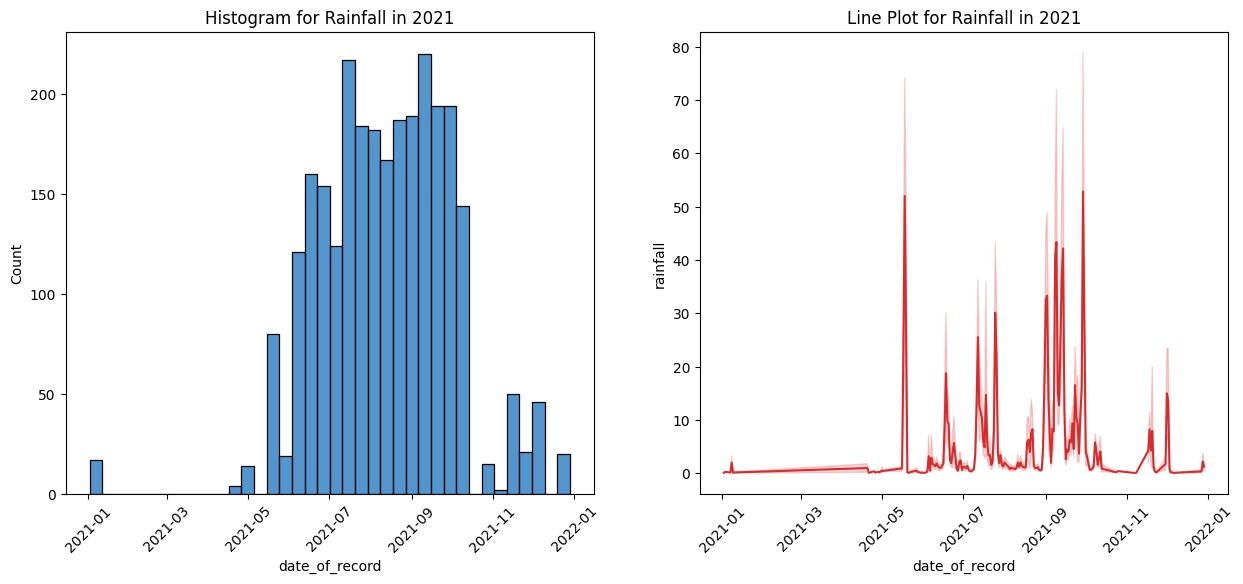

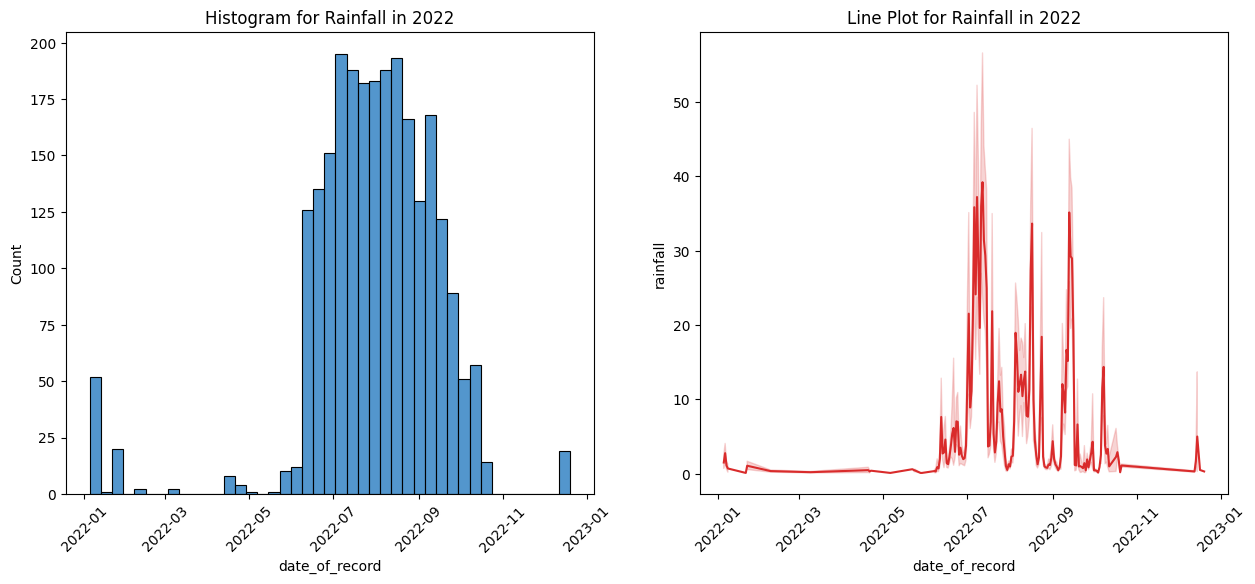

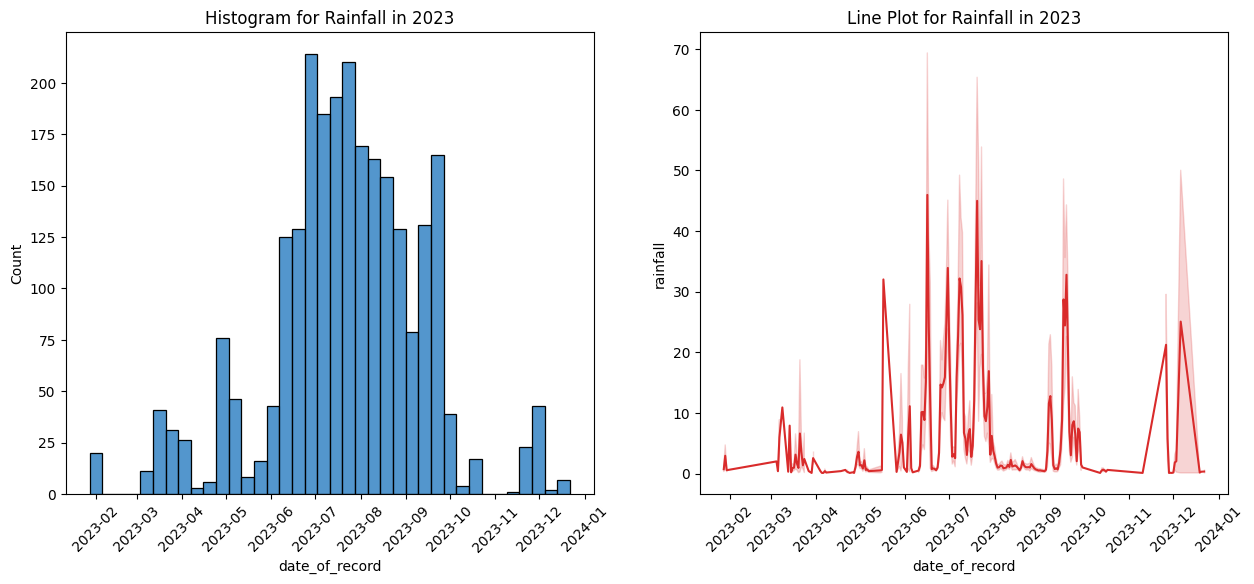

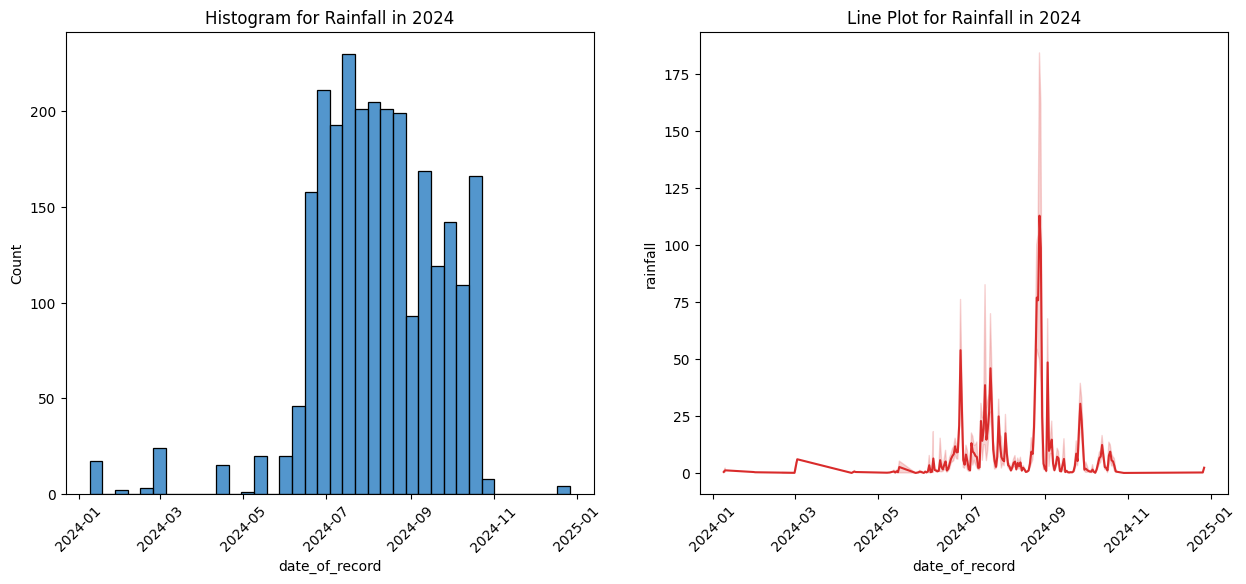

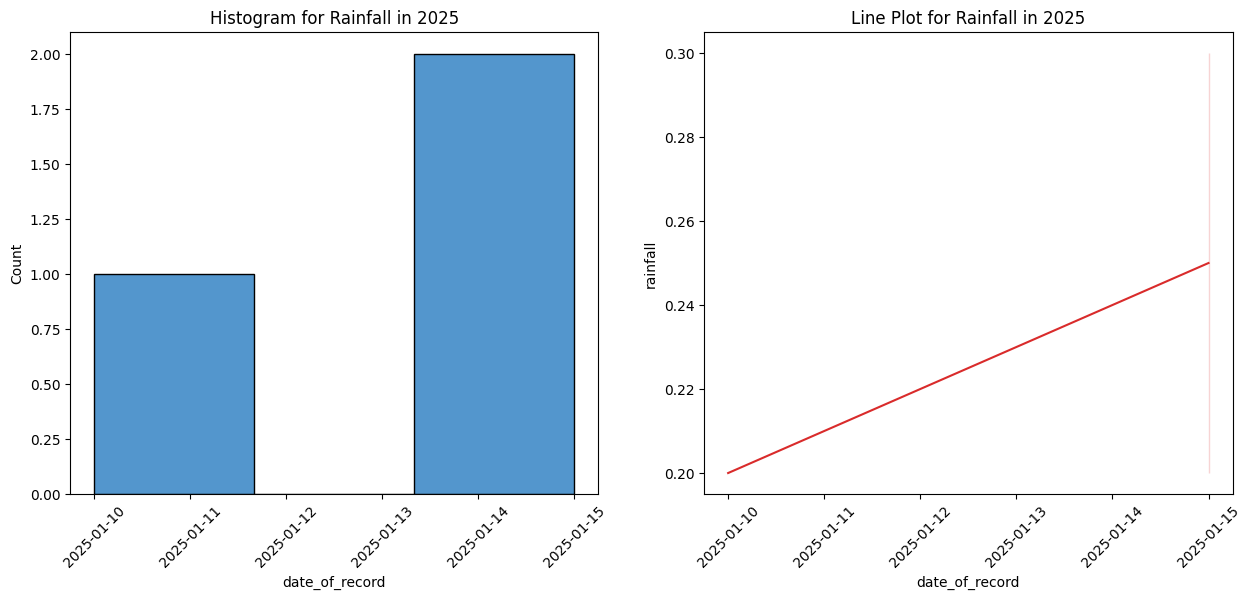

In [47]:
for grp, data in dataset.groupby(dataset["date_of_record"].dt.year):
    dt_univar_plots(data, "date_of_record", "rainfall")


# -------------------------------------------------------------------------------------------
# Observation :
# 1) Rainfall mostly in "June", "July", "August" and "September" months which naturally correct.
# -------------------------------------------------------------------------------------------

In [48]:
px.sunburst(dataset, path=["district","station_name","month"], values="rainfall", width=1200, height=800, title="Pie Chart of Rainfall in District and Stations with Months")

### Data Cleaning

In [49]:
dataset = dataset.drop(columns=["date_of_record", "state"])
dataset.head()

month   season station_name     district  avg_temp  min_temp  max_temp  \
186  June   Summer        Deesa  Banaskantha      34.8      28.7      38.9   
194  June   Summer        Deesa  Banaskantha      32.9      27.3      36.4   
205  July  Monsoon        Deesa  Banaskantha      29.5      25.4      32.2   
206  July  Monsoon        Deesa  Banaskantha      28.1      24.6      30.2   
207  July  Monsoon        Deesa  Banaskantha      30.0      26.2      33.0   

     wind_speed  air_pressure  elevation  latitude  longitude  rainfall  
186        14.2        1003.9        135      24.2       72.2       0.8  
194        14.2        1003.9        135      24.2       72.2       2.0  
205        14.2        1003.9        135      24.2       72.2      54.1  
206        14.2        1003.9        135      24.2       72.2       7.1  
207        14.2        1003.9        135      24.2       72.2       0.3

#### Numerical Features

In [50]:
numeric_cols = numeric_cols.to_list()[:-1]
numeric_cols

['avg_temp',
 'min_temp',
 'max_temp',
 'wind_speed',
 'air_pressure',
 'elevation',
 'latitude',
 'longitude']

In [51]:
# normal distribution - Z-Score

for col in ["avg_temp", "max_temp", "air_pressure"]:
    lower, upper = dataset[col].mean() - (3 * dataset[col].std()), dataset[col].mean() + (3 * dataset[col].std())
    dataset = dataset[(dataset[col] > lower) & (dataset[col] < upper)]

In [52]:
# skewed distribution - IQR

for col in ["min_temp", "wind_speed", "elevation"]:
    percentile25 = dataset[col].quantile(0.25)
    percentile75 = dataset[col].quantile(0.75)

    iqr = percentile75 - percentile25

    lower_limit = percentile25 - (1.5 * iqr)
    upper_limit = percentile75 + (1.5 * iqr)

    dataset = dataset[(dataset[col] > lower_limit) & (dataset[col] < upper_limit)]

----------------------------------------------------------------------------------------------------
Feature Name: avg_temp

Descriptive Statistics:
count    10810.000000
mean        28.433025
std          1.408292
min         22.700000
25%         27.500000
50%         28.300000
75%         29.300000
max         33.900000
Name: avg_temp, dtype: float64

Skewness: 0.5262592859721225


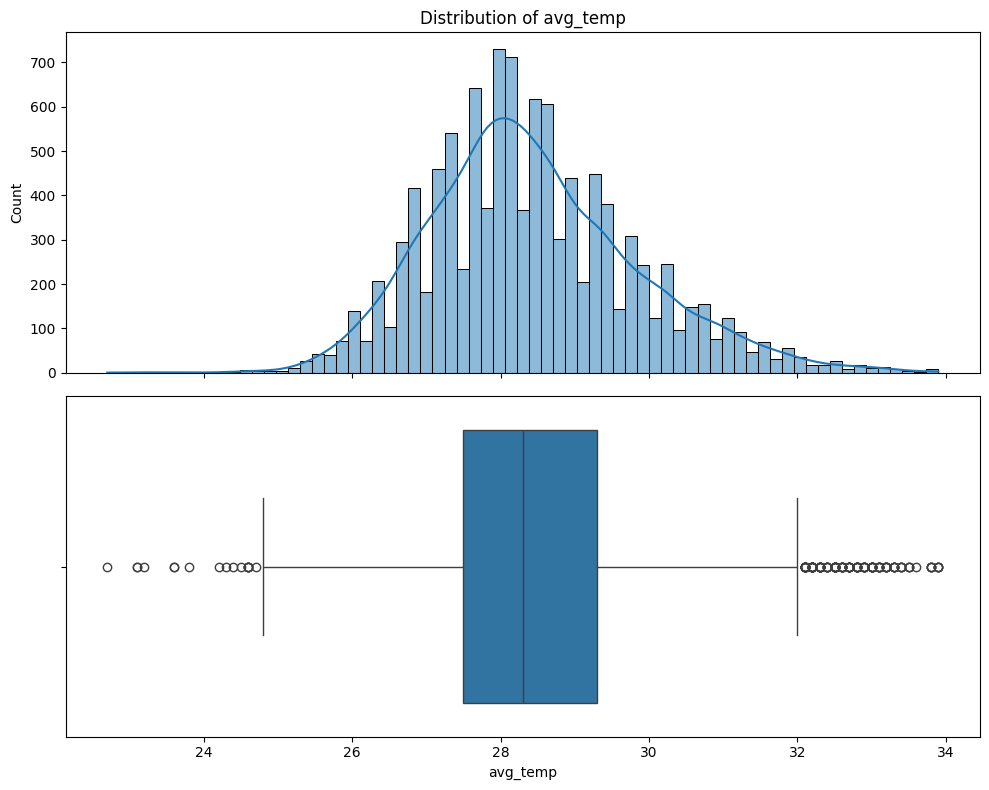

----------------------------------------------------------------------------------------------------
Feature Name: min_temp

Descriptive Statistics:
count    10810.000000
mean        25.883515
std          1.194535
min         22.600000
25%         25.100000
50%         25.800000
75%         26.600000
max         29.000000
Name: min_temp, dtype: float64

Skewness: 0.1423865561538668


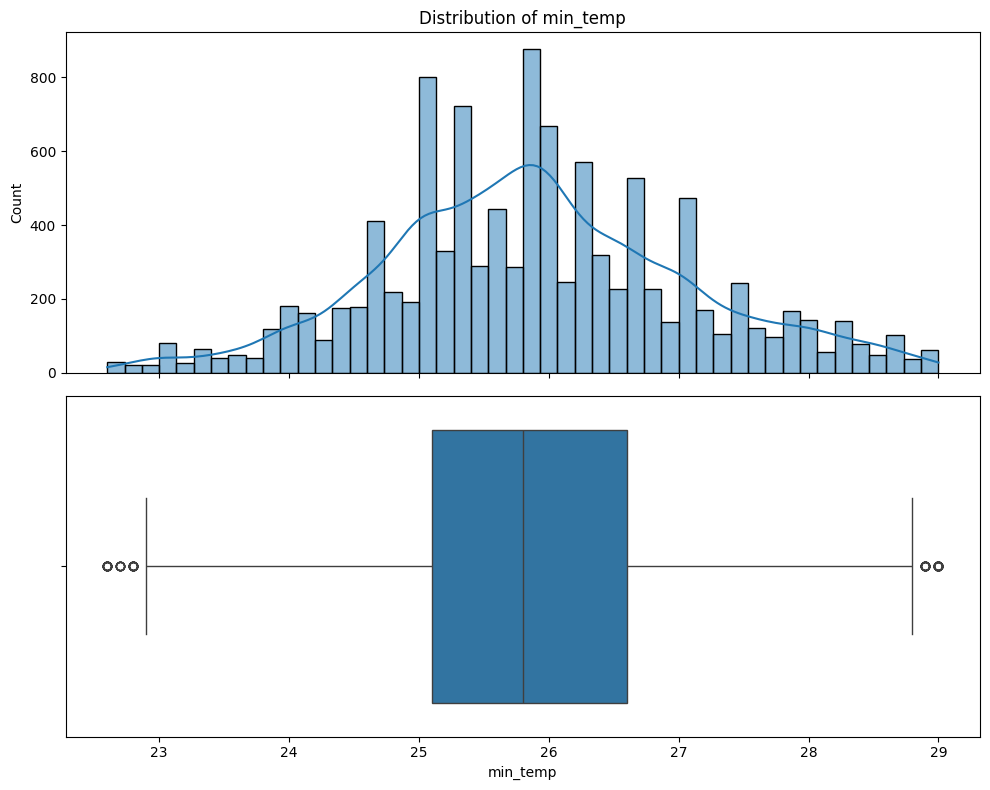

----------------------------------------------------------------------------------------------------
Feature Name: max_temp

Descriptive Statistics:
count    10810.000000
mean        31.830962
std          2.192233
min         25.400000
25%         30.400000
50%         31.600000
75%         33.000000
max         39.000000
Name: max_temp, dtype: float64

Skewness: 0.49876535661202065


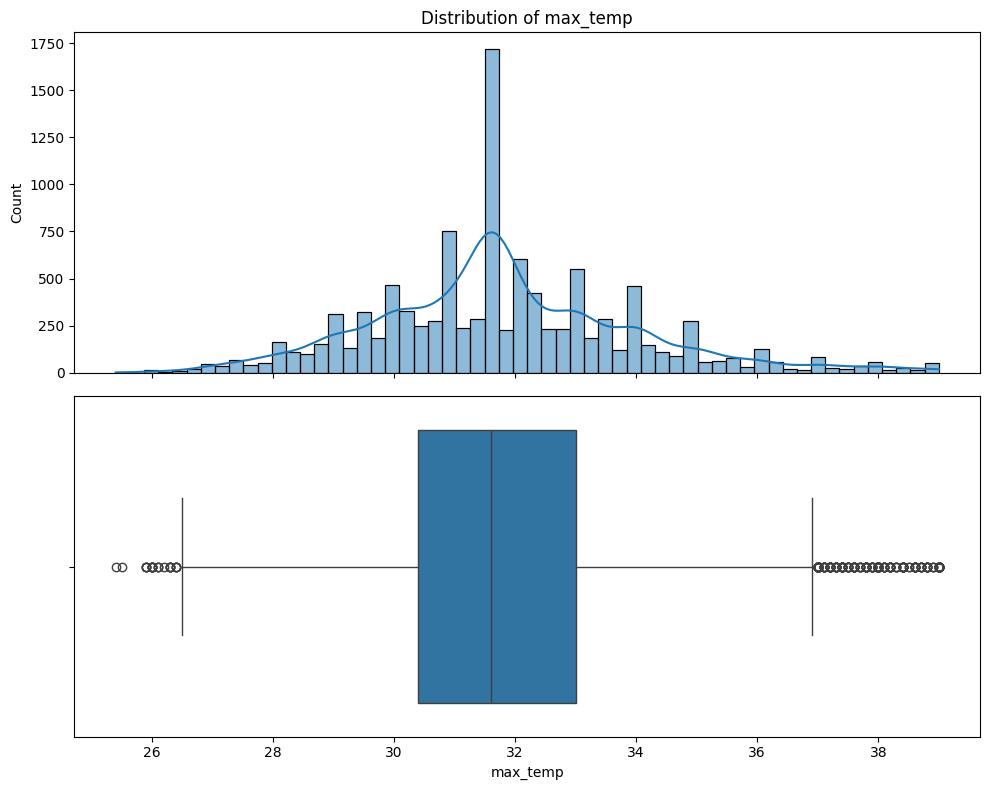

----------------------------------------------------------------------------------------------------
Feature Name: wind_speed

Descriptive Statistics:
count    10810.000000
mean        14.716827
std          5.528291
min          0.000000
25%         10.900000
50%         14.200000
75%         17.700000
max         29.500000
Name: wind_speed, dtype: float64

Skewness: 0.5227474672768149


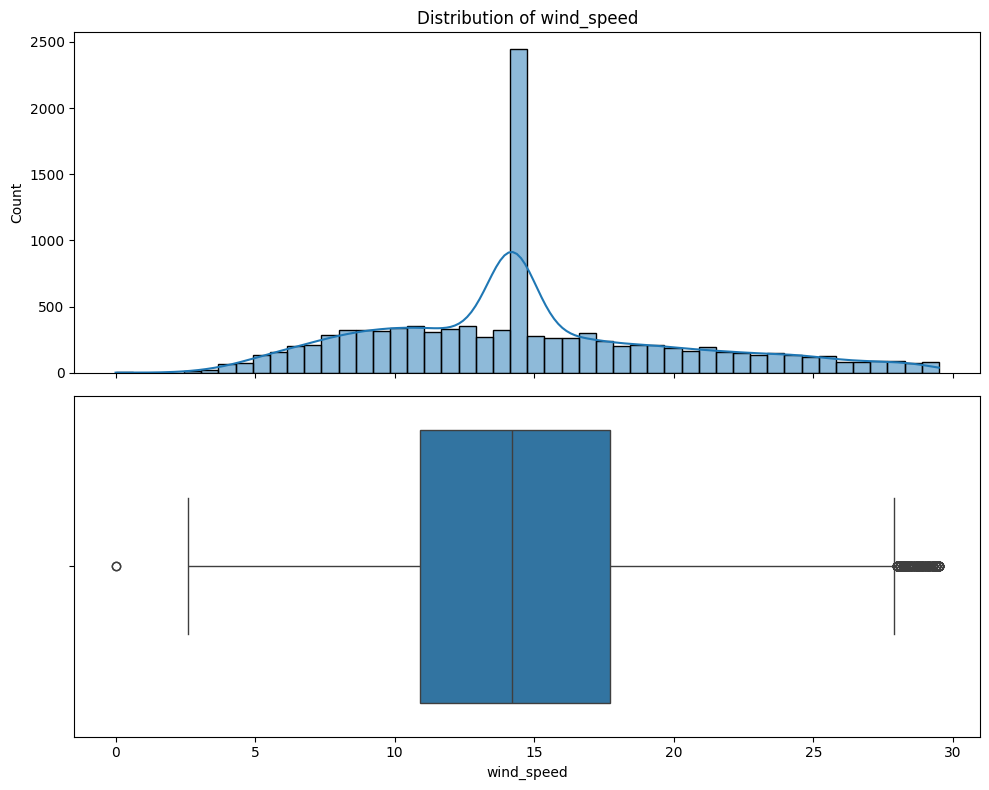

----------------------------------------------------------------------------------------------------
Feature Name: air_pressure

Descriptive Statistics:
count    10810.000000
mean      1003.817438
std          2.925963
min        994.200000
25%       1002.300000
50%       1003.900000
75%       1005.500000
max       1013.300000
Name: air_pressure, dtype: float64

Skewness: -0.19243164886566258


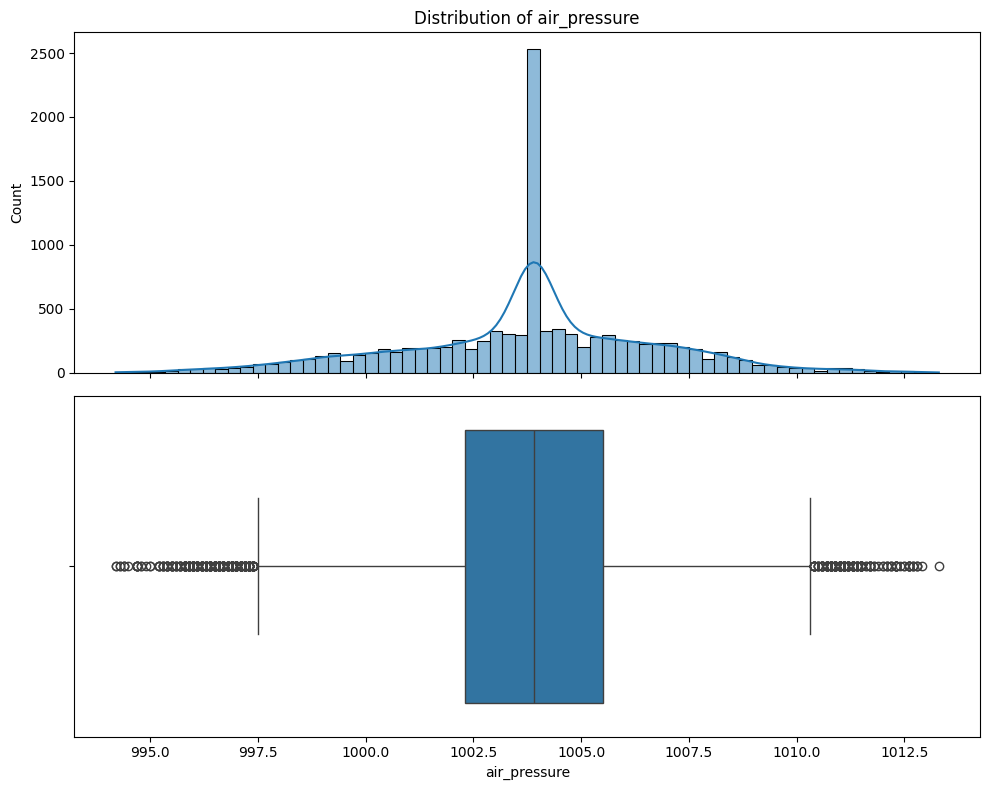

----------------------------------------------------------------------------------------------------
Feature Name: elevation

Descriptive Statistics:
count    10810.000000
mean        19.689177
std         22.081870
min          0.000000
25%          5.000000
50%         10.000000
75%         34.000000
max         78.000000
Name: elevation, dtype: float64

Skewness: 1.287232839193098


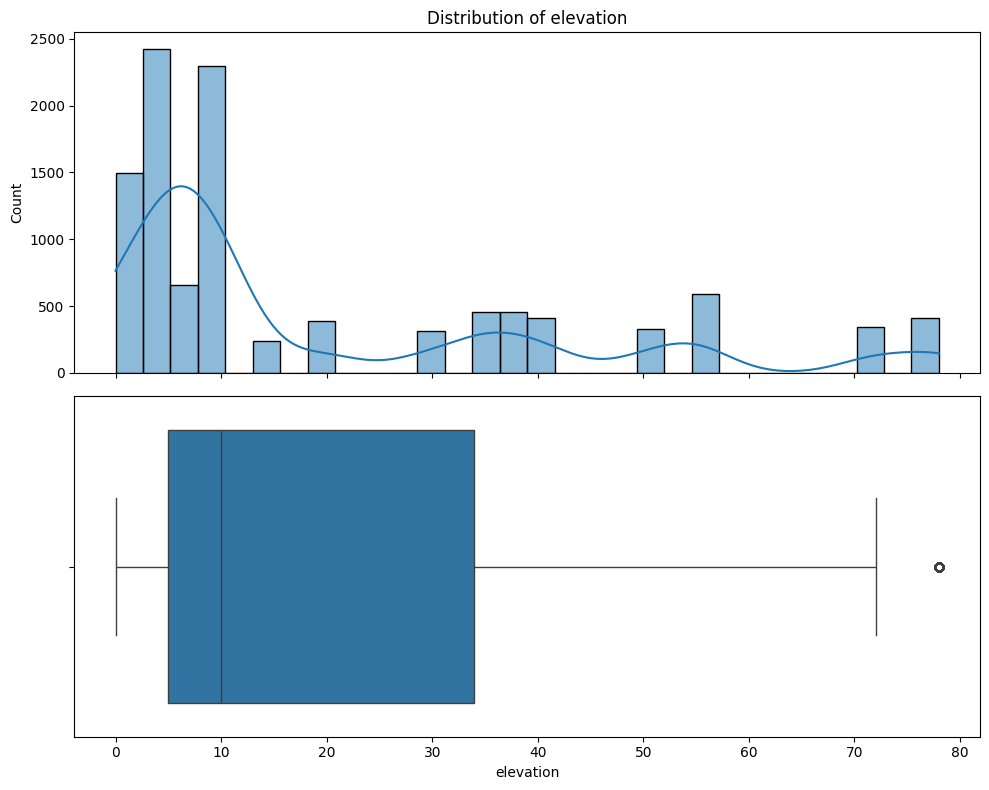

----------------------------------------------------------------------------------------------------
Feature Name: latitude

Descriptive Statistics:
count    10810.000000
mean        22.001195
std          0.875841
min         20.616700
25%         21.114100
50%         22.300000
75%         22.733300
max         23.250000
Name: latitude, dtype: float64

Skewness: 0.03970605849539722


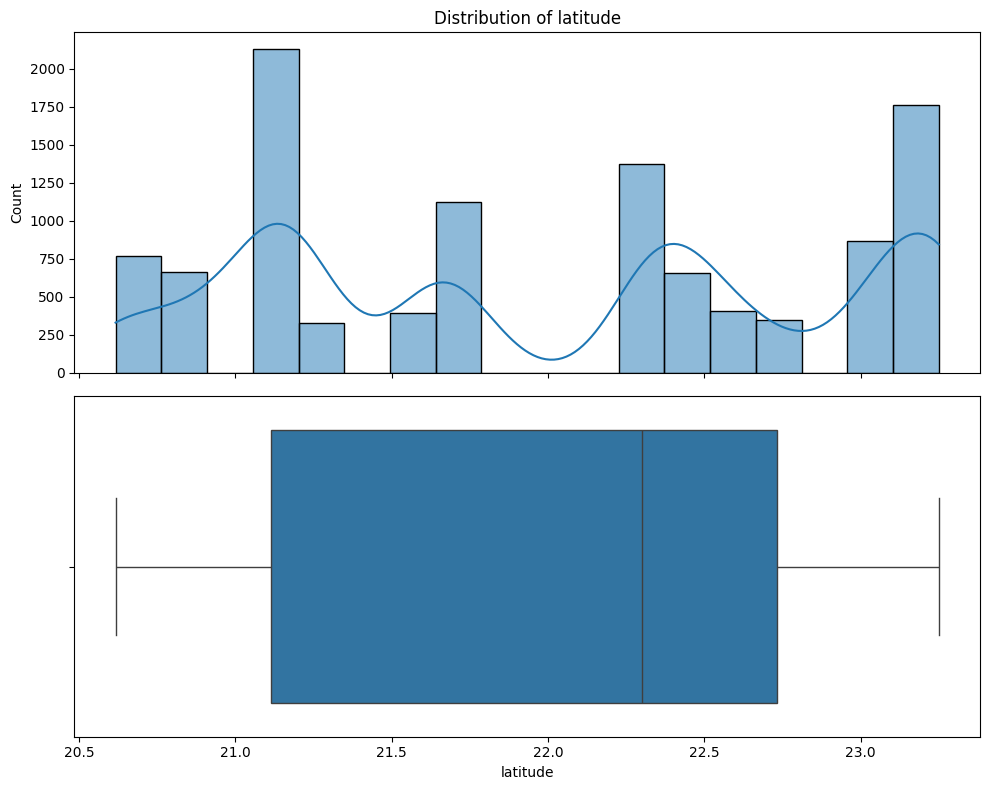

----------------------------------------------------------------------------------------------------
Feature Name: longitude

Descriptive Statistics:
count    10810.000000
mean        71.450398
std          1.478778
min         68.850000
25%         70.116700
50%         71.783300
75%         72.741800
max         73.266700
Name: longitude, dtype: float64

Skewness: -0.3567009898598827


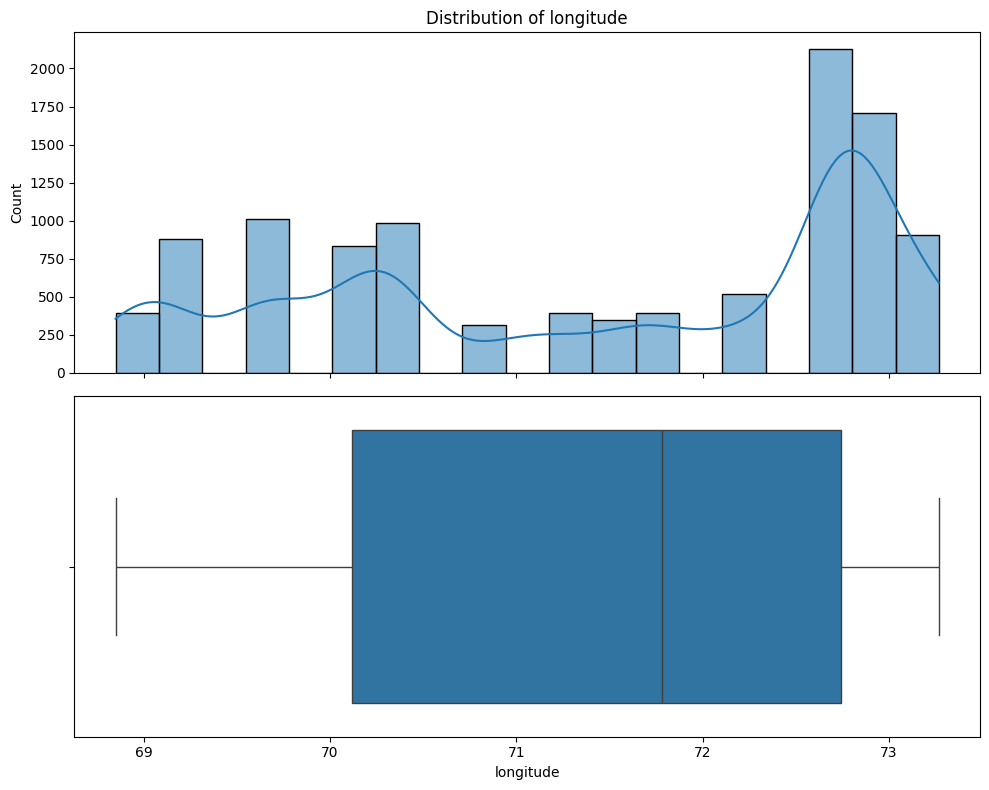

In [53]:
for col in numeric_cols:
    numerical_univariate(dataset, col)

#### Categorical Features

In [54]:
categorical_cols = dataset.select_dtypes(include="O").columns

dataset = pd.get_dummies(dataset, columns=categorical_cols, prefix='Category', dtype=int, drop_first=True)

dataset.head()

avg_temp  min_temp  max_temp  wind_speed  air_pressure  elevation  \
2988      31.4      28.3      34.9        14.2        1003.9         20   
2992      29.6      27.6      32.2        14.2        1003.9         20   
2993      29.6      27.4      32.4        14.2        1003.9         20   
2995      30.4      27.8      33.0        14.2        1003.9         20   
2999      30.2      27.4      31.6        14.2        1003.9         20   

      latitude  longitude  rainfall  Category_August  Category_December  \
2988     23.25      68.85       1.0                0                  0   
2992     23.25      68.85       0.5                0                  0   
2993     23.25      68.85       0.5                0                  0   
2995     23.25      68.85       2.0                0                  0   
2999     23.25      68.85       1.0                0                  0   

      Category_February  Category_January  Category_July  Category_June  \
2988                  0                 0              1              0   
2992                  0                 0              1              0   
2993                  0                 0              1              0   
2995                  0                 0              1              0   
2999                  0                 0              1              0   

      Category_March  Category_May  Category_November  Category_October  \
2988               0             0                  0                 0   
2992               0             0                  0                 0   
2993               0             0                  0                 0   
2995               0             0                  0                 0   
2999               0             0                  0                 0   

      Category_September  Category_Post-monsoon  Category_Summer  \
2988                   0                      0                0   
2992                   0                      0                0   
2993                   0                      0                0   
2995                   0                      0                0   
2999                   0                      0                0   

      Category_Winter  Category_Amreli  Category_Baroda / Vadodara  \
2988                0                0                           0   
2992                0                0                           0   
2993                0                0                           0   
2995                0                0                           0   
2999                0                0                           0   

      Category_Baroda Aerodrome  Category_Bhaunagar  Category_Bhuj-Rudramata  \
2988                          0                   0                        0   
2992                          0                   0                        0   
2993                          0                   0                        0   
2995                          0                   0                        0   
2999                          0                   0                        0   

      Category_Bulsar  Category_Diu  Category_Dwarka  Category_Gandhinagar  \
2988                0             0                0                     0   
2992                0             0                0                     0   
2993                0             0                0                     0   
2995                0             0                0                     0   
2999                0             0                0                     0   

      Category_Jamnagar  Category_Kandla Aerodrome  Category_Keshod  \
2988                  0                          0                0   
2992                  0                          0                0   
2993                  0                          0                0   
2995                  0                          0                0   
2999                  0                          0                0

### Model Building & Training

In [55]:
X = dataset.drop(columns=["rainfall"])
y = dataset["rainfall"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (8648, 58)
X_test:  (2162, 58)
y_train:  (8648,)
y_test:  (2162,)


In [57]:
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [58]:
linear_model = LinearRegression()

In [59]:
linear_model.fit(X_train_trf, y_train)

LinearRegression()

In [60]:
y_pred = linear_model.predict(X_test_trf)

r2_score(y_test, y_pred)

0.17436357061044094

In [61]:
res = pd.DataFrame()

res["y_test"] = y_test
res["y_pred"] = y_pred

res

y_test     y_pred
36783     6.2  17.399190
57709     2.1   3.992252
58908     0.5  10.264984
37169     0.1  -4.251766
39708     1.1   4.855884
...       ...        ...
44291     7.0  14.687891
42818     6.0  19.180665
43228     0.7  16.216145
35996     7.4  26.644946
51616     5.1  17.867053

[2162 rows x 2 columns]

#### ------------------------------------------------------------------------------------------------------------------------------------------

In [62]:
X = dataset[["avg_temp","min_temp","max_temp","wind_speed","air_pressure","elevation","latitude","longitude"]]
y = dataset["rainfall"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_trf, y_train)

y_pred = linear_model.predict(X_test_trf)

r2_score(y_test, y_pred)

0.13828935886274207